In [2]:
# Practice solving ODEs and SDEs
# Fit rainfall-runoff for CHOSEN  dataset
# Jan 26, 2021, Omar Wani

# source for ODE solution #### (edited from desktop and laptop)
# https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations

import numpy as np
from scipy.integrate import odeint
import scipy.stats as stats

%matplotlib inline 
import matplotlib.pyplot as plt

import math
import statsmodels.api as sm            # for autocorrelation function
import os
import seaborn as sns


In [3]:
path_1 = '/home/waniomar/Office/Berkeley/Scripts'
os.chdir(path_1)

$dy/dt=-kt$ (try the easy ode)

<ipython-input-4-5d93917ef055>:4: RuntimeWarning: invalid value encountered in sqrt
  dydt = -k*(y*500)**0.5


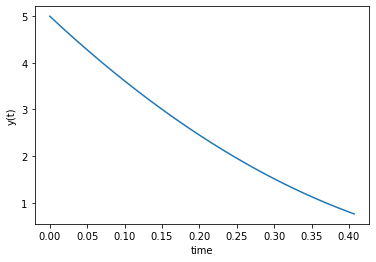

In [4]:

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k*(y*500)**0.5
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,1,10000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

# Rainfall-runoff model

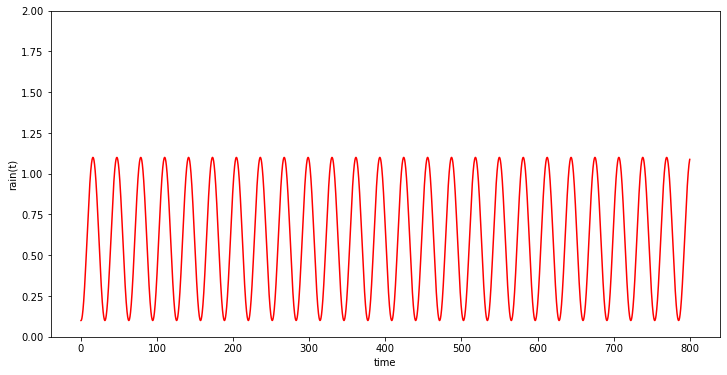

In [5]:
t = np.linspace(0,800,8000)
rain = (np.sin(t*0.1))**2+0.1
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(t, rain, color='red', label='Sine wave')
plt.xlabel('time')
plt.ylabel('rain(t)')
plt.ylim([0,2])

plt.show()

In [5]:
#np.random.seed(1)
t = np.linspace(0,800,8000)
rain = (np.sin(t*0.1))**2+0.1

beta = 0.1  # Standard deviation.
K = 5.0  # Mean.

dt = 0.1  # Time step.
T = 800.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

sim =2
xo = np.zeros([n,sim])

for j in range(sim-1):
    for i in range(n - 1):
        xo[i + 1,j] = xo[i,j] + rain[i]*dt -1/K*(1+beta/2)*xo[i,j]*dt #+ \
        #np.sqrt(beta/K)*x[i,j]*np.random.normal(0,np.sqrt(dt),1)



In [6]:
np.random.seed(1)
t = np.linspace(0,800,8000)
rain = (np.sin(t*0.1))**2+0.1

beta = 0.1  # 
K = 5.0  # 

dt = 0.1  # Time step.
T = 800.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

x = np.zeros([n,100])

for j in range(99):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + rain[i]*dt -1/K*(1+beta/2)*x[i,j]*dt + \
        np.sqrt(beta/K)*x[i,j]*np.random.normal(0,np.sqrt(dt),1)


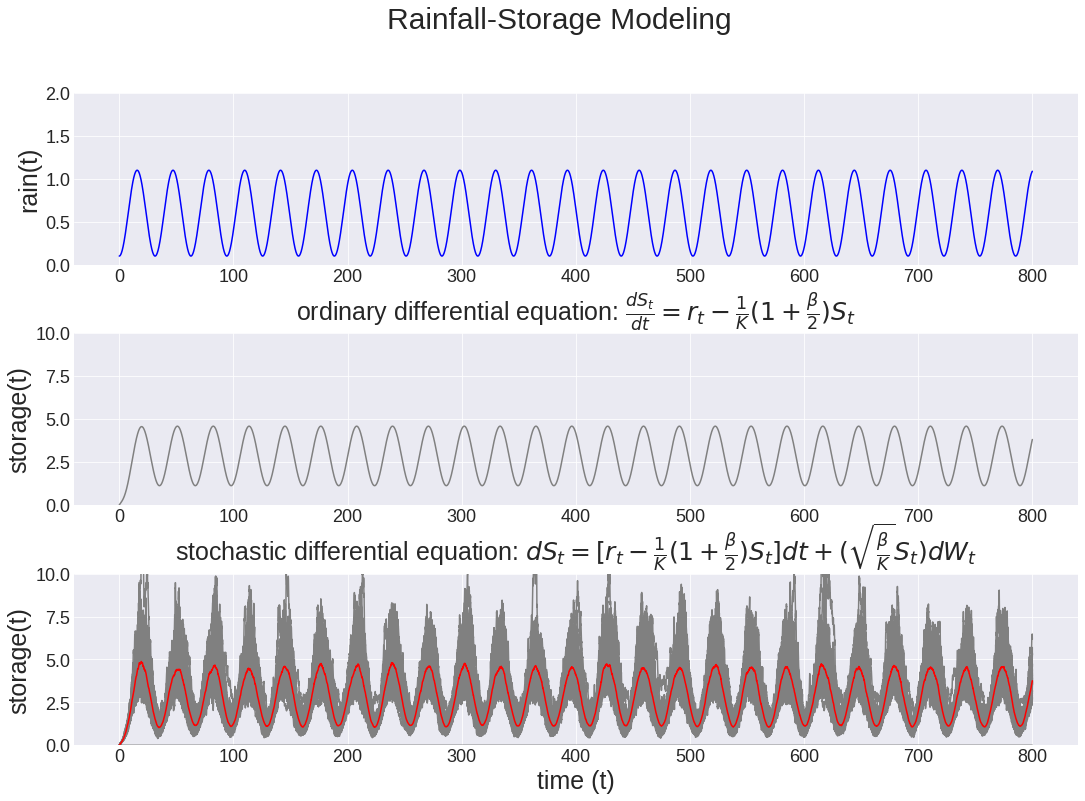

In [7]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(3,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,xo[:,0], color = 'gray')
ax[2].plot(t,x, color = 'gray')
ax[2].plot(t,x.mean(axis=1), color = 'red')

ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

ax[1].set_ylim([0,10])
ax[1].set_xlabel('', fontsize = 25)
ax[1].set_ylabel('storage(t)', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=18)
ax[1].set_title('ordinary differential equation: ' r'$\frac{dS_t}{dt}= r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t$', fontsize =25)

ax[2].set_ylim([0,10])
ax[2].set_xlabel('time (t)', fontsize = 25)
ax[2].set_ylabel('storage(t)', fontsize = 25)
ax[2].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[2].tick_params(axis='both', which='major', labelsize=18)
fig.savefig('SDE_test.jpg',dpi = 150)

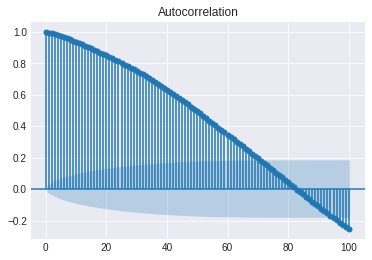

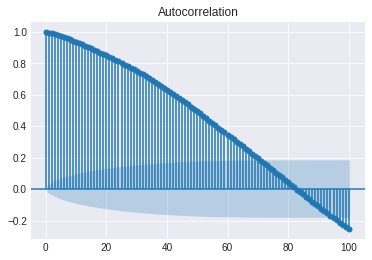

In [11]:
#sm.api.graphics.tsa.plot_acf(xo[:,0], lags=100)
sm.graphics.tsa.plot_acf(x[:,1], lags=100)


In [12]:
# Use the storage-discharge relationship from Kirchner, 2009
#np.random.seed(1)
t = np.linspace(0,800,8000)
rain = (np.sin(t*0.1))**2+0.1
#rain = np.concatenate([5*np.ones(1000),np.zeros(7000)])

beta = 0.005
K = 5.0  
a = 1
b= 2.3

dt = 0.1  # Time step.
T = 800.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.



In [13]:
sim =2
xo = 3*np.ones([n,sim])

for j in range(sim-1):
    for i in range(n - 1):
        xo[i + 1,j] = xo[i,j] + rain[i]*dt - a/(K-xo[i,j])**(1/(b-2))*dt 

x = 3*np.ones([n,100])

for j in range(99):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + rain[i]*dt -a/(K-x[i,j])**(1/(b-2))*dt + \
        np.sqrt(beta)*x[i,j]*np.random.normal(0,np.sqrt(dt),1)


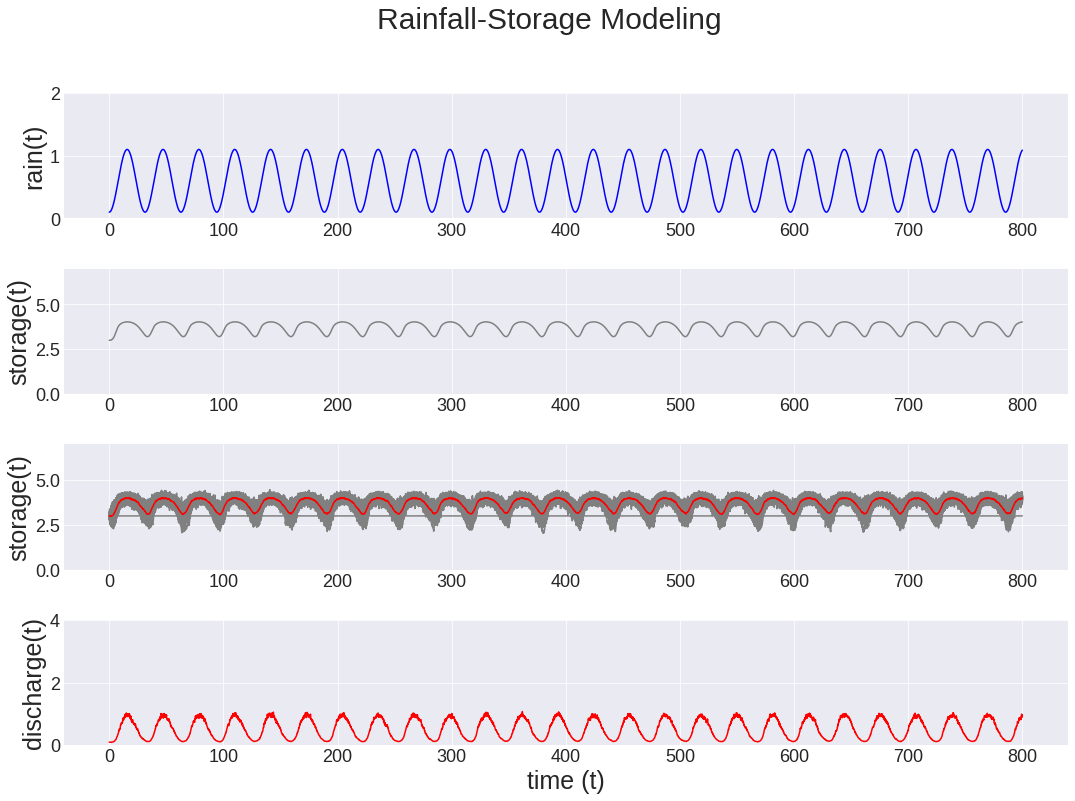

In [14]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(4,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,xo[:,0], color = 'gray')
ax[2].plot(t,x, color = 'gray')
ax[2].plot(t,x.mean(axis=1), color = 'red')
ax[3].plot(t,a/(K-x.mean(axis=1))**(1/(b-2)), color = 'red')

ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

ax[1].set_ylim([0,7])
ax[1].set_xlabel('', fontsize = 25)
ax[1].set_ylabel('storage(t)', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=18)
#ax[1].set_title('ordinary differential equation: ' r'$\frac{dS_t}{dt}= r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t$', fontsize =25)

ax[2].set_ylim([0,7])
ax[2].set_xlabel('', fontsize = 25)
ax[2].set_ylabel('storage(t)', fontsize = 25)
#ax[2].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[2].tick_params(axis='both', which='major', labelsize=18)

ax[3].set_ylim([0,4])
ax[3].set_xlabel('time (t)', fontsize = 25)
ax[3].set_ylabel('discharge(t)', fontsize = 25)
#ax[3].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[3].tick_params(axis='both', which='major', labelsize=18)

#fig.savefig('SDE_test.jpg',dpi = 150)

# Define functions to read data

In [336]:
# import data (Scripting by Liang Zhang)

In [4]:
import pandas as pd
import datetime as dt
import copy
from pandas.plotting import register_matplotlib_converters
import copy
import os
import netCDF4 as nc4            # to work with netCDFs
import time

register_matplotlib_converters()
os.getcwd()

'/home/waniomar/Office/Berkeley/Scripts'

In [5]:
watershed = ['1-EastRiver', '2-DryCreek','3-Sagehen','4-HJAndrews','5-Baltimore',
             '6-Bonanza','7-CCE','8-CentralArizona','9-Coweeta','10-Florida',
             '11-Georgia','12-Harvard','13-Hubbard','14-Jornada','15-Kellogg',
             '16-KonzaPrairie','17-NGA','18-PlumIsland','19-Sevilleta','20-Boulder',
             '21-Catalina','22-Jemez','23-WhiteClay','24-Luquillo','25-Reynolds',
             '26-ShaleHill','27-SanJoaquin','28-Providence','29-Wolverton','30-Calhoun']

In [6]:
path = '/home/waniomar/Office/Berkeley/Data_Zhang/chosen-master/DataProduct'

In [7]:
ws='EastRiver'
File=ws+'_NetCDF.nc'
ncdf = nc4.Dataset(path +'/'+ File, 'r')

In [8]:
# date - time info
def get_time_range(watershed_number):
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    dt_lst=[pd.to_datetime(i) for i in ncdf.variables['Datetime'][:]]
    ncdf.close()
    print(ws+' data is from', dt_lst[0], 'to',dt_lst[-1])
    #return [str(dt_lst[0]),str(dt_lst[1])]

In [9]:
# station info
def get_station_name(watershed_number):
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'][:]
    ncdf.close()
    return stn_names
def get_station_latitude(watershed_number):
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'].Latitude
    ncdf.close()
    return stn_names
def get_station_longitude(watershed_number):
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'].Longitude
    ncdf.close()
    return stn_names
def get_station_elevation(watershed_number): # in meter
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'].Elevation_m
    ncdf.close()
    return stn_names

In [10]:
# extract data table
def get_data(watershed_number,variable_names_lst=[]): # variable_names_lst=[] to get all the data
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    keys_lst=list(ncdf.variables.keys())
    len_keys=len(keys_lst)
    print("Hydrometeorological variables in this watershed are:")
    all_variables=keys_lst[2:int(len_keys/2)]
    print(all_variables)
    if variable_names_lst==[]:
        for i,var in enumerate(all_variables):
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), 
                                        str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, 
                                columns = [ncdf.variables[var].names])
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')
    else:
        for i,var in enumerate(variable_names_lst):
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), 
                                        str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            
            if ncdf.variables[var][:].shape[1]==1:
                var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, columns = [ncdf.variables[var].names])
            else:
                var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, columns = ncdf.variables[var].names)
            
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')      
    ncdf.close()
    former_df.index.rename('DateTime',inplace = True)
    return former_df

# Fit the SDE to CHOSEN dataset

Georgia
Georgia
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection']
Georgia
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection']


<AxesSubplot:xlabel='DateTime'>

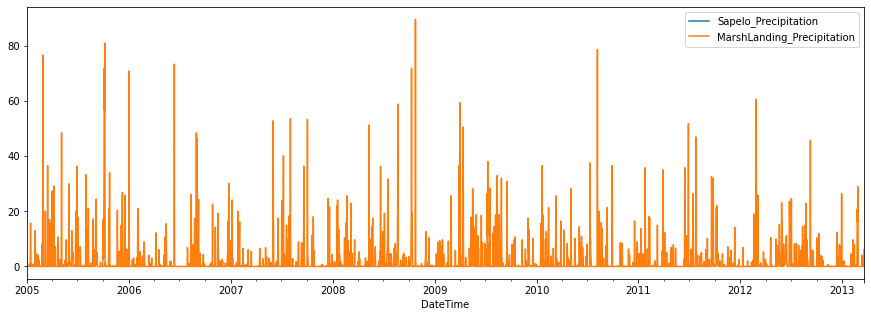

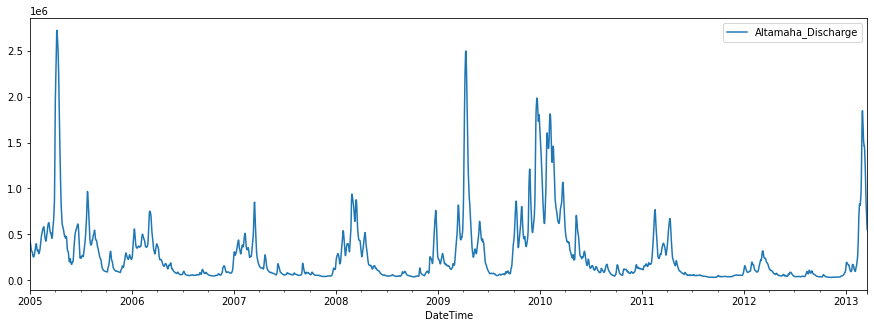

In [13]:
##########
get_station_name(11)
get_data(11,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])
get_data(11,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])

HJAndrews
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


<AxesSubplot:xlabel='DateTime'>

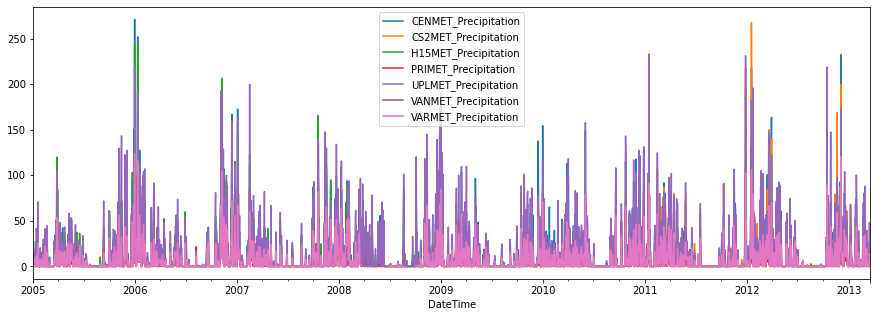

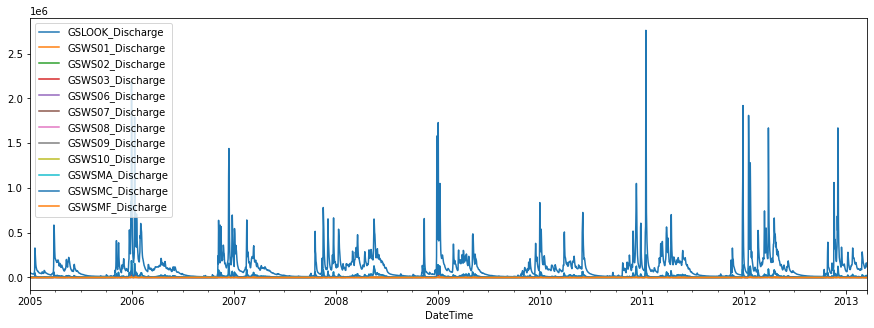

In [14]:
##########
get_station_name(4)
get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])
get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])

In [24]:
rain = get_data(11,['Precipitation']).loc['2005-1-1':'2015-1-1']
rain = np.array(rain["MarshLanding_Precipitation"])[0:3000]

beta = 0.005
K = 2.0  
a = 1
b= 2.3

dt = 0.1  # Time step.
T = 300.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

sim =2
xo = 0*np.ones([n,sim])

for j in range(sim-1):
    for i in range(n - 1):
        xo[i + 1,j] = xo[i,j] + rain[i]*dt -1/K*(1+beta/2)*xo[i,j]*dt #+ \
        #np.sqrt(beta/K)*x[i,j]*np.random.normal(0,np.sqrt(dt),1)


x = 0*np.ones([n,100])

for j in range(99):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + rain[i]*dt -1/K*(1+beta/2)*x[i,j]*dt + \
        np.sqrt(beta/K)*x[i,j]*np.random.normal(0,np.sqrt(dt),1)

Georgia
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection']


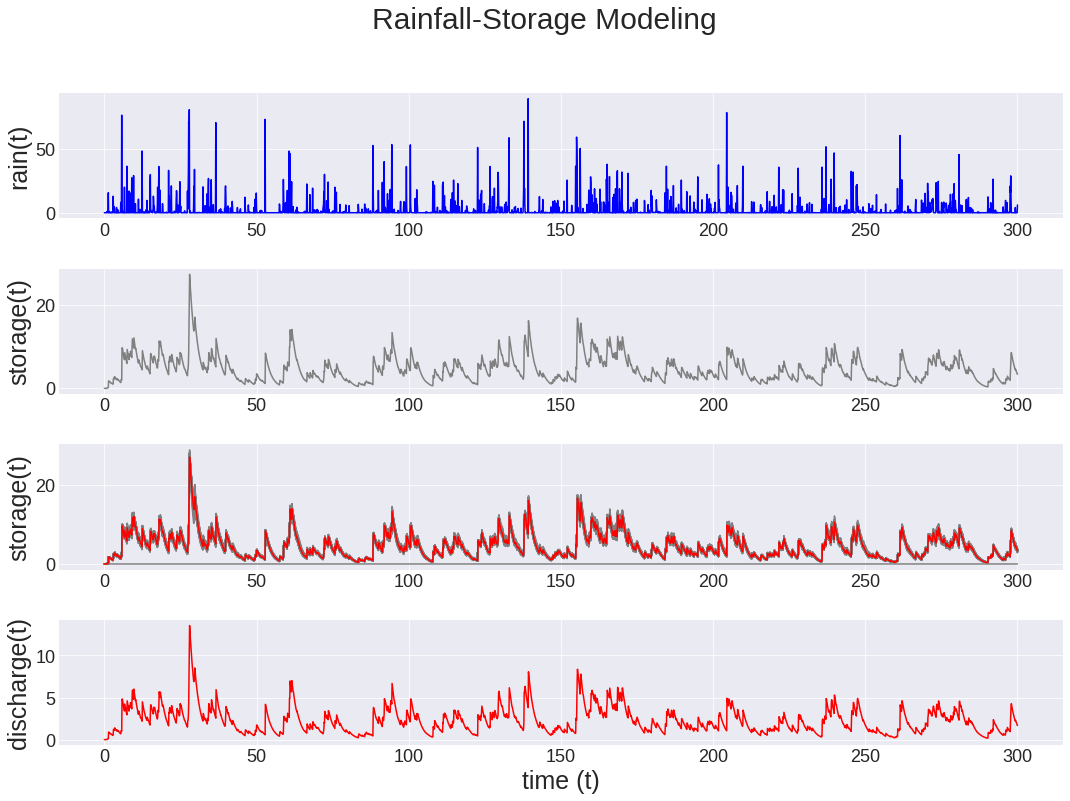

In [25]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(4,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,xo[:,0], color = 'gray')
ax[2].plot(t,x, color = 'gray')
ax[2].plot(t,x.mean(axis=1), color = 'red')
#ax[3].plot(t,a/(K-x.mean(axis=1))**(1/(b-2)), color = 'red')
ax[3].plot(t,1/K*(1+beta/2)*x.mean(axis=1), color = 'red')

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,7])
ax[1].set_xlabel('', fontsize = 25)
ax[1].set_ylabel('storage(t)', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=18)
#ax[1].set_title('ordinary differential equation: ' r'$\frac{dS_t}{dt}= r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t$', fontsize =25)

#ax[2].set_ylim([0,7])
ax[2].set_xlabel('', fontsize = 25)
ax[2].set_ylabel('storage(t)', fontsize = 25)
#ax[2].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[2].tick_params(axis='both', which='major', labelsize=18)

#ax[3].set_ylim([0,4])
ax[3].set_xlabel('time (t)', fontsize = 25)
ax[3].set_ylabel('discharge(t)', fontsize = 25)
#ax[3].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[3].tick_params(axis='both', which='major', labelsize=18)

#fig.savefig('SDE_test.jpg',dpi = 150)

ShaleHill
ShaleHill
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SoilMoisture', 'SoilTemperature']
ShaleHill
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SoilMoisture', 'SoilTemperature']


<AxesSubplot:xlabel='DateTime'>

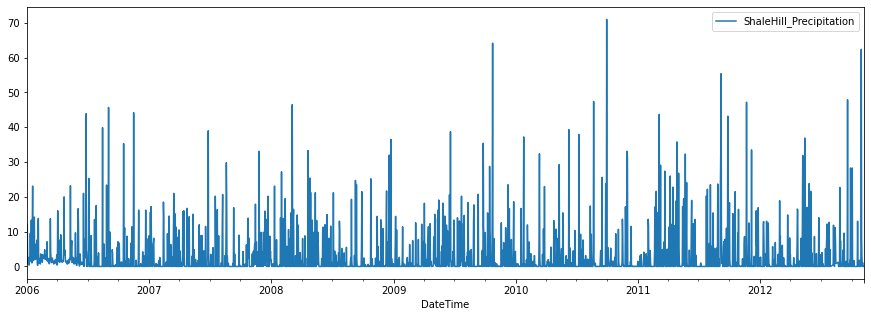

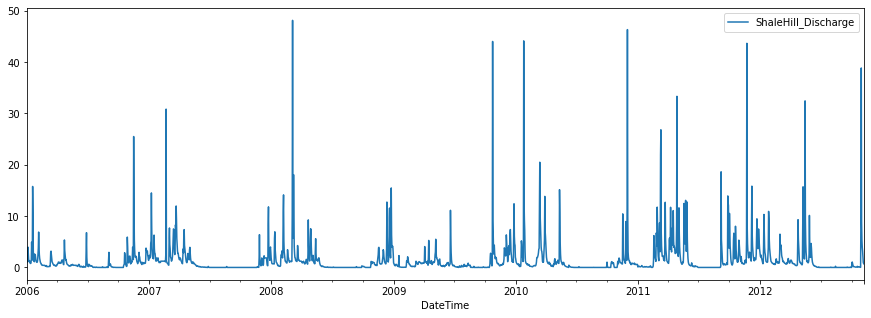

In [55]:
##########
get_station_name(26)
get_data(26,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])
get_data(26,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])

In [27]:
rain = get_data(26,['Precipitation']).loc['2006-1-1':'2012-1-1']
rain = np.array(rain["ShaleHill_Precipitation"])[0:2000]

beta = 0.1
K = 1.0  
a = 1
b= 2.3

dt = 0.1  # Time step.
T = 200.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

sim =2
xo = 0*np.ones([n,sim])

for j in range(sim-1):
    for i in range(n - 1):
        xo[i + 1,j] = xo[i,j] + rain[i]*dt -1/K*(1+beta/2)*xo[i,j]*dt #+ \
        #np.sqrt(beta/K)*x[i,j]*np.random.normal(0,np.sqrt(dt),1)


x = 0*np.ones([n,100])

for j in range(99):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + rain[i]*dt -1/K*(1+beta/2)*x[i,j]*dt + \
        np.sqrt(beta/K)*x[i,j]*np.random.normal(0,np.sqrt(dt),1)

ShaleHill
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SoilMoisture', 'SoilTemperature']


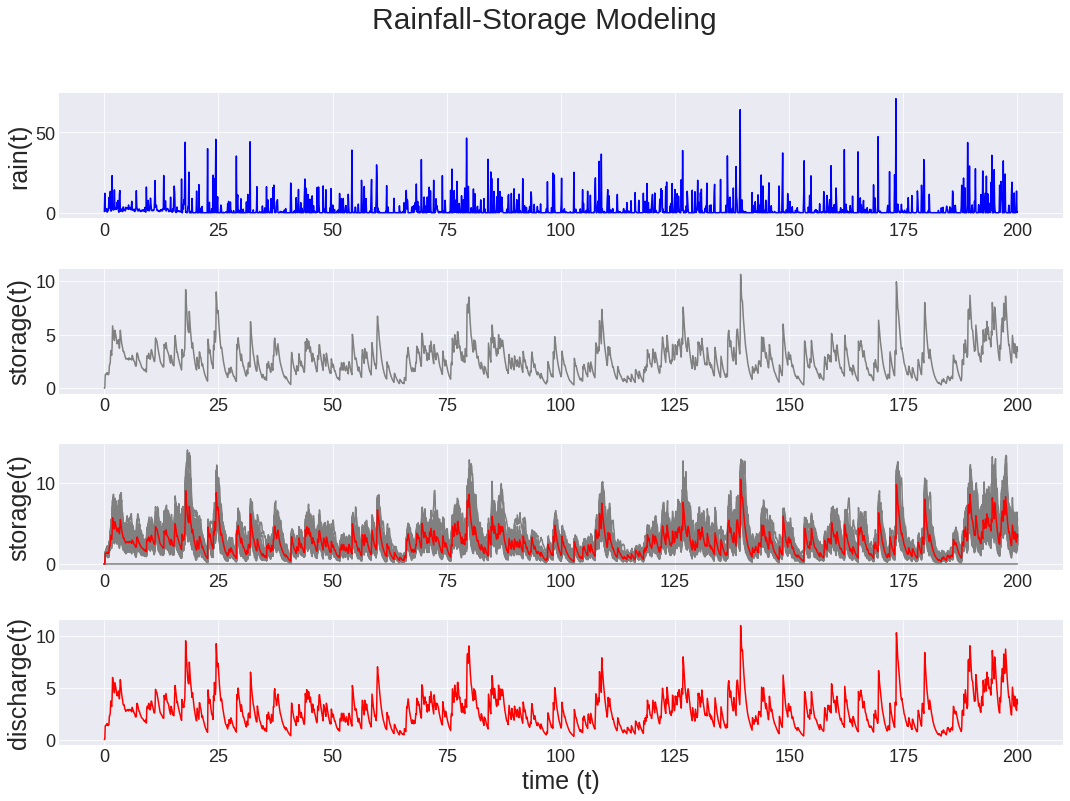

In [28]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(4,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,xo[:,0], color = 'gray')
ax[2].plot(t,x, color = 'gray')
ax[2].plot(t,x.mean(axis=1), color = 'red')
#ax[3].plot(t,a/(K-x.mean(axis=1))**(1/(b-2)), color = 'red')
ax[3].plot(t,1/K*(1+beta/2)*x.mean(axis=1), color = 'red')

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,7])
ax[1].set_xlabel('', fontsize = 25)
ax[1].set_ylabel('storage(t)', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=18)
#ax[1].set_title('ordinary differential equation: ' r'$\frac{dS_t}{dt}= r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t$', fontsize =25)

#ax[2].set_ylim([0,7])
ax[2].set_xlabel('', fontsize = 25)
ax[2].set_ylabel('storage(t)', fontsize = 25)
#ax[2].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[2].tick_params(axis='both', which='major', labelsize=18)

#ax[3].set_ylim([0,4])
ax[3].set_xlabel('time (t)', fontsize = 25)
ax[3].set_ylabel('discharge(t)', fontsize = 25)
#ax[3].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[3].tick_params(axis='both', which='major', labelsize=18)

#fig.savefig('SDE_test.jpg',dpi = 150)

# Run an ABC algorithm

In [11]:
import astroabc

In [12]:
rain = np.array(get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
discharge = np.asarray(get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['GSLOOK_Discharge'])


K = 2.0 
beta = 0.005

dt = 0.1  # Time step.
T = 300.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.


def hru1(par):
    x = np.ones(n)
    for i in range(n - 1):
        x[i + 1] = x[i] + rain[i]*dt -1/par[0]*(1+par[1]/2)*x[i]*dt + \
        np.sqrt(par[1]/par[0])*x[i]*np.random.normal(0,np.sqrt(dt),1)
    return ((10**par[2])*x*1/par[0]*(1+par[1]/2))

a = 1
b = 2.3
K = 5.0  
beta = 0.005

def hru2(par):
    x = np.ones(n)
    for i in range(n - 1):
        x[i + 1] = x[i] + rain[i]*dt -par[0]/(par[2]-x[i])**(1/(par[1]-2))*dt + \
        np.sqrt(par[3])*x[i]*np.random.normal(0,np.sqrt(dt),1)
    return ((10**par[4])*par[0]/(par[2]-x[i])**(1/(par[1]-2)))


HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


In [168]:
data1 = hru1([0.2, 0.01,4.1])
data2 = hru2([1, 3, 2, 1,4.5])

<AxesSubplot:>

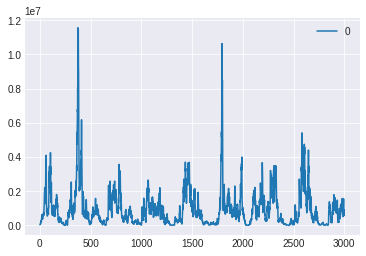

In [169]:
data1 = hru1([5, 2,5])
pd.DataFrame(data1).plot()

In [170]:
pd.DataFrame(data2).plot()

ValueError: DataFrame constructor not properly called!

In [67]:
def dist_metric(d,x):
    return np.mean(np.abs(x - d))/(np.mean(d))

In [171]:
def dist_metric(d,x):
    return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)

In [172]:
dist_metric(data1, discharge)

1.4189524157391336

In [173]:
priors =  [('uniform', [0.01,2]), ('uniform', [0.001,2]),('normal', [4.1, 0.5])]

In [174]:
prop={'dfunc':dist_metric, 'tol_type':'exp','outfile':"4.txt", 'verbose':1, 'adapt_t': True, 'mp': True, 'num_proc':20}


In [190]:
sampler = astroabc.ABC_class(3,100,discharge,[3,0.2],1000,priors,**prop)

	 	
	 ########################     astroABC     ########################	
	 	
	 Npart=100 	 numt=1000 	 tol=[3.0000,0.2000] exp
	 Priors= [('uniform', [0.01, 2]), ('uniform', [0.001, 2]), ('normal', [4.1, 0.5])]


<ipython-input-188-dad823f05c73>:17: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1] = x[i] + rain[i]*dt -1/par[0]*(1+par[1]/2)*x[i]*dt + \
<ipython-input-188-dad823f05c73>:17: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1] = x[i] + rain[i]*dt -1/par[0]*(1+par[1]/2)*x[i]*dt + \
<ipython-input-188-dad823f05c73>:19: RuntimeWarning: overflow encountered in multiply
  return ((10**par[2])*x*1/par[0]*(1+par[1]/2))
<ipython-input-188-dad823f05c73>:19: RuntimeWarning: overflow encountered in true_divide
  return ((10**par[2])*x*1/par[0]*(1+par[1]/2))
<ipython-input-171-e26cd2766738>:2: RuntimeWarning: overflow encountered in square
  return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)
<ipython-input-188-dad823f05c73>:17: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1] = x[i] + rain[i]*dt -1/par[0]*(1+par[1]/2)*x[i]*dt + \
<ipython-input-188-dad823f05c73>:17: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1] = x

<ipython-input-188-dad823f05c73>:18: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(par[1]/par[0])*x[i]*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-188-dad823f05c73>:19: RuntimeWarning: overflow encountered in multiply
  return ((10**par[2])*x*1/par[0]*(1+par[1]/2))
<ipython-input-188-dad823f05c73>:19: RuntimeWarning: overflow encountered in true_divide
  return ((10**par[2])*x*1/par[0]*(1+par[1]/2))
<ipython-input-171-e26cd2766738>:2: RuntimeWarning: overflow encountered in square
  return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)
<ipython-input-188-dad823f05c73>:18: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(par[1]/par[0])*x[i]*np.random.normal(0,np.sqrt(dt),1)
<ipython-input-188-dad823f05c73>:17: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1] = x[i] + rain[i]*dt -1/par[0]*(1+par[1]/2)*x[i]*dt + \
<ipython-input-188-dad823f05c73>:17: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1] = x[i] + rain[i]*dt -1

<ipython-input-188-dad823f05c73>:17: RuntimeWarning: invalid value encountered in add
  x[i + 1] = x[i] + rain[i]*dt -1/par[0]*(1+par[1]/2)*x[i]*dt + \
<ipython-input-188-dad823f05c73>:17: RuntimeWarning: invalid value encountered in add
  x[i + 1] = x[i] + rain[i]*dt -1/par[0]*(1+par[1]/2)*x[i]*dt + \
/home/waniomar/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-188-dad823f05c73>:17: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1] = x[i] + rain[i]*dt -1/par[0]*(1+par[1]/2)*x[i]*dt + \
<ipython-input-188-dad823f05c73>:17: RuntimeWarning: invalid value encountered in add
  x[i + 1] = x[i] + rain[i]*dt -1/par[0]*(1+par[1]/2)*x[i]*dt + \
<ipython-input-188-dad823f05c73>:17: RuntimeWarning: invalid value encountered in add
  x[i + 1] = x[i] + rain[i]*dt -1/par[0]*(1+par[1]/2)*x[i]*dt + \
<ipython-input-171-e26cd2766738>:2: Runt

In [191]:
import timeit

start = timeit.default_timer()
sampler.sample(hru1)
stop = timeit.default_timer()

print('Time: ', stop - start)  

	 Step: 0 	 tol: 3.0 	 Params: [1.0369617477656747, 0.9398667490960123, 3.84214592572361]
	 Step: 1 	 tol: 1.2362658561986244 	 Params: [1.4402625674214684, 1.079391920629942, 3.8098270758105945]
	 Step: 2 	 tol: 1.092472966574404 	 Params: [1.5187487092788279, 1.049188294423073, 3.8746571697564822]
	 Step: 3 	 tol: 0.9965357545727511 	 Params: [1.2735065567523995, 0.7674010479296557, 3.929609405403541]
	 Step: 4 	 tol: 0.9167173499406658 	 Params: [1.2526495786715452, 0.6173449349269248, 3.953202647832222]
	 Step: 5 	 tol: 0.8712275436892122 	 Params: [1.3612718816706744, 0.48957375200578795, 4.011490396743223]
	 Step: 6 	 tol: 0.8255775045313436 	 Params: [1.3477234498670179, 0.40569947715602817, 4.027566830553931]
	 Step: 7 	 tol: 0.7810542003089654 	 Params: [1.0157615194344347, 0.2969615904617223, 4.01591617035551]
	 Step: 8 	 tol: 0.7465132976690548 	 Params: [1.118394603553029, 0.21406246266504078, 4.062502231554489]
	 Step: 9 	 tol: 0.7237679036227713 	 Params: [1.0479241273366

In [56]:
# import  samples
data = ("4.txt")
samples  =  pd.read_fwf(filepath_or_buffer=data, header =0)
samplespar = samples[["param#0","param#1","param#2"]]




array([0.240326, 0.483571, 4.29326 ])

<AxesSubplot:title={'center':'Maximum annual prcipitation'}>

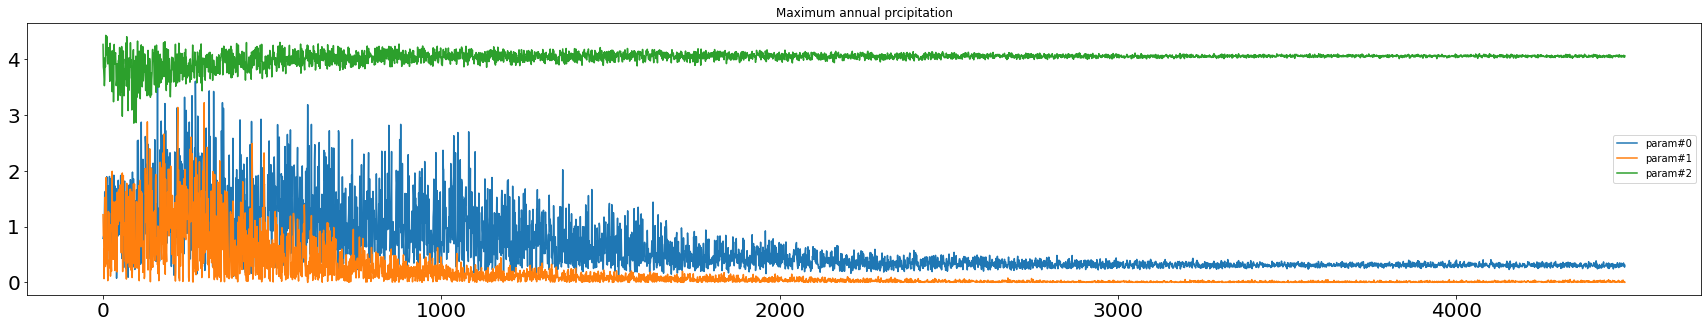

In [14]:
samplespar.plot(kind='line', figsize=[30,5], fontsize = 20, title = 'Sample traces')
#samplespar.plot(kind='hist',y ='AMS_cdx', figsize=[30,5], fontsize = 20, title = 'Maximum annual prcipitation')

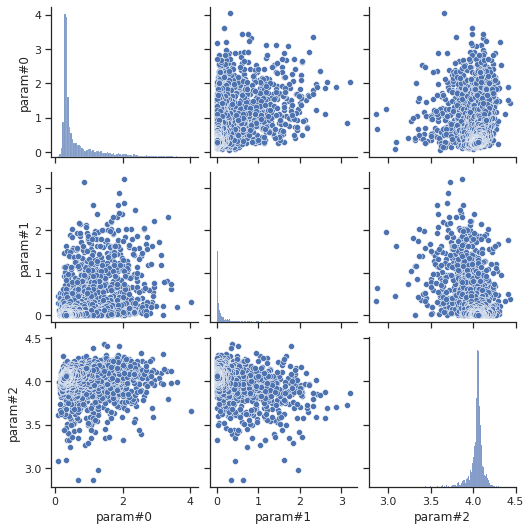

In [105]:
sns.set(style="ticks")
sns.set_theme(style="ticks")
sns.pairplot(samplespar)

In [110]:
df= pd.DataFrame({'A':samplespar, 'B':samplespar*0.5})

ValueError: If using all scalar values, you must pass an index

In [131]:
# prior and posterior
inference = pd.concat([pd.DataFrame(samplespar),pd.DataFrame(0.5*samplespar)])
prob_type =["prior"]*samplespar.shape[0] + ["posterior"]*samplespar.shape[0]
inference["prob_type"]=prob_type

param#0   param#1   param#2  prob_type
0     0.789750  1.214140  4.265371      prior
1     0.822877  0.833834  3.862456      prior
2     0.834124  0.833703  3.808346      prior
3     0.740168  0.067540  3.675106      prior
4     1.118854  0.600078  3.525613      prior
...        ...       ...       ...        ...
4495  0.174540  0.006123  2.034645  posterior
4496  0.153369  0.006547  2.034674  posterior
4497  0.152798  0.005999  2.025149  posterior
4498  0.136898  0.006959  2.017631  posterior
4499  0.153685  0.001755  2.030146  posterior

[9000 rows x 4 columns]

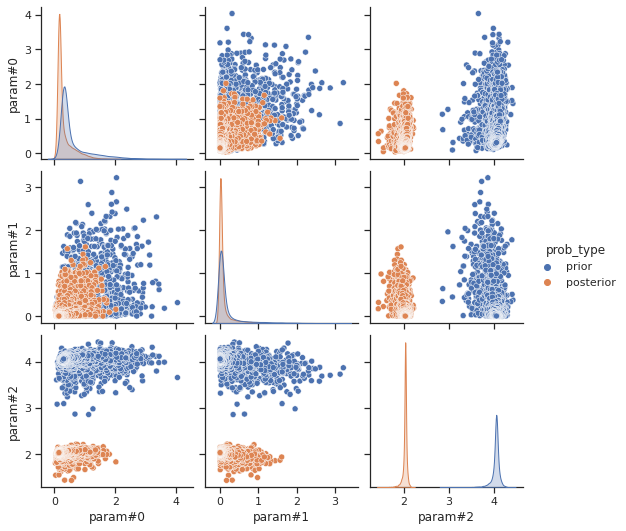

In [132]:
sns.pairplot(inference, hue="prob_type")

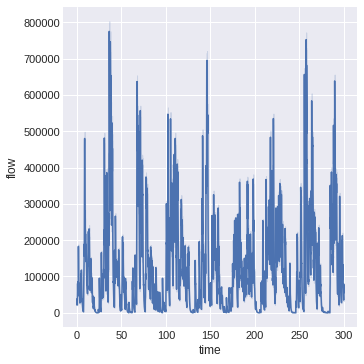

In [162]:
data = pd.DataFrame({'time': list(t.repeat(100)), 'flow':list(sim.flatten())})
sns.relplot(x='time',y='flow',kind="line", data =data)

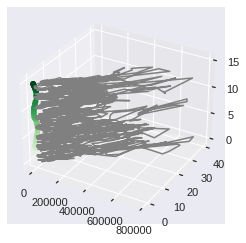

In [164]:
# phase space
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 3000)
xline = sim.mean(axis=1)
yline = x[:,3]
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

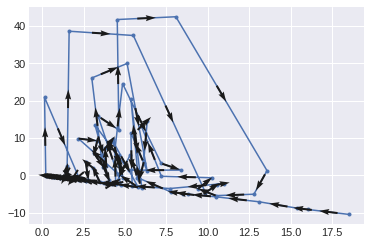

In [172]:
# phase space
par = [2, 0.3,4.5]
a = x[400:500,3]
b = rain[400:500]-1/par[0]*(1+par[1]/2)*x[400:500,3]

u = np.diff(a)
v = np.diff(b)
pos_a = a[:-1] + u/2
pos_b = b[:-1] + v/2
norm = np.sqrt(u**2+v**2) 

fig, ax = plt.subplots()
ax.plot(a,b, marker=".")
ax.quiver(pos_a, pos_b, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")
plt.show()

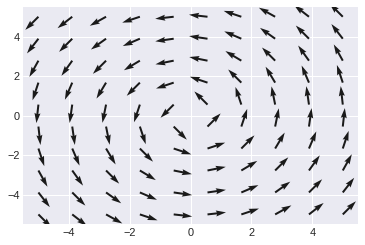

In [173]:
x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = -y/np.sqrt(x**2 + y**2)
v = x/np.sqrt(x**2 + y**2)

plt.quiver(x,y,u,v)
plt.show()

In [57]:
par = [np.asarray(samplespar)[:,0].mean(),np.asarray(samplespar)[:,1].mean(),np.asarray(samplespar)[:,2].mean()]
par = np.array(samplespar)[pd.read_csv(filepath_or_buffer=data, delimiter  =' ',header =0)["\t.1"].idxmax(),:]

In [58]:
#par = [2, 0.3,4.5]
par

array([0.240326, 0.483571, 4.29326 ])

In [59]:
rain = np.array(get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
discharge = np.asarray(get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['GSLOOK_Discharge'])

n =3000
x = np.ones([n,200])


dt = 0.1  # Time step.
T = 300.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.


for j in range(199):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + rain[i]*dt -1/par[0]*(1+par[1]/2)*x[i,j]*dt + \
        np.sqrt(par[1]/par[0])*x[i,j]*np.random.normal(0,np.sqrt(dt),1)
sim = 1/par[0]*(1+par[1]/2)*x*(10**par[2])


HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmel

<AxesSubplot:xlabel='DateTime'>

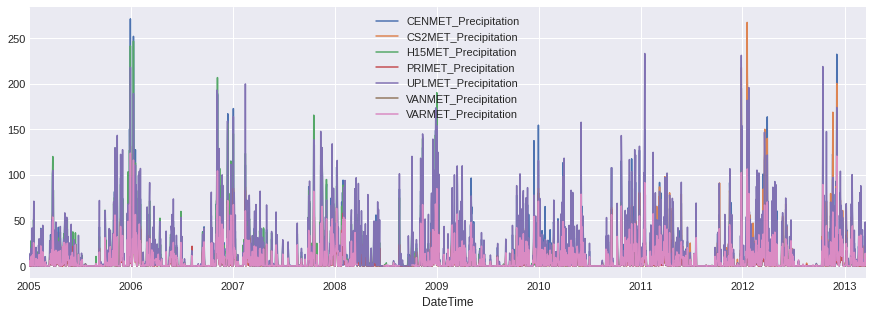

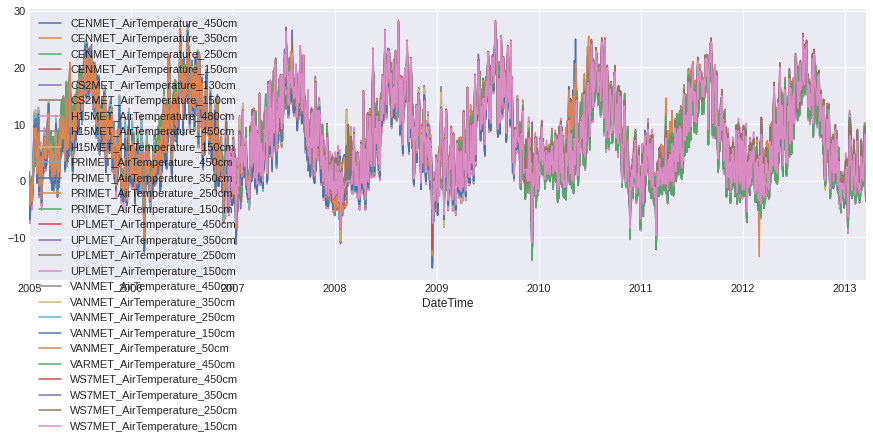

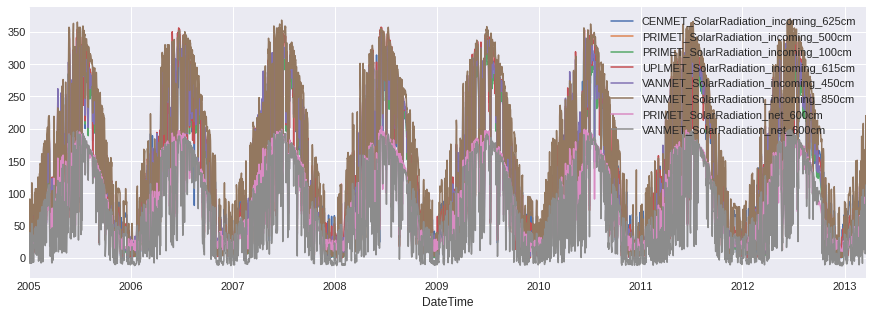

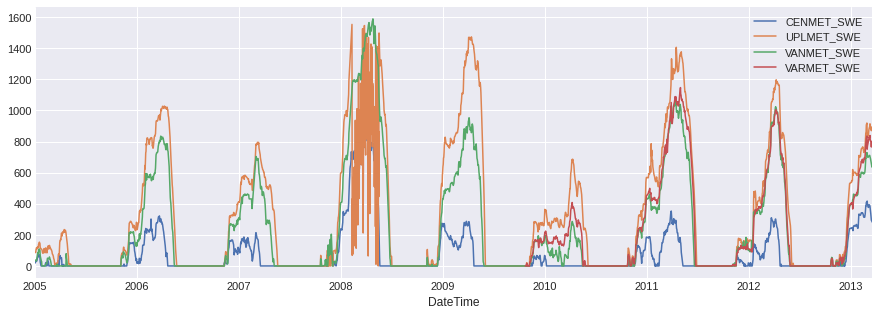

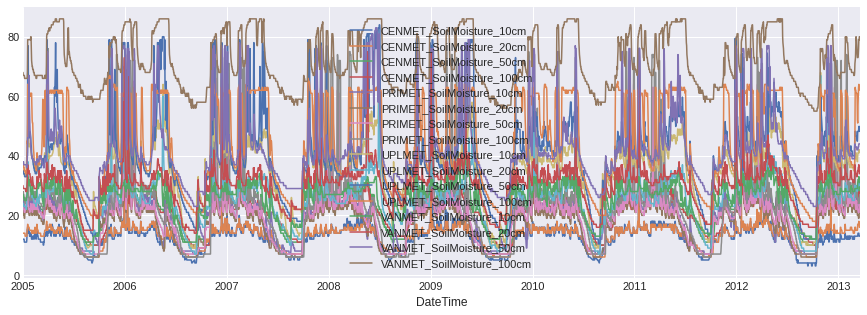

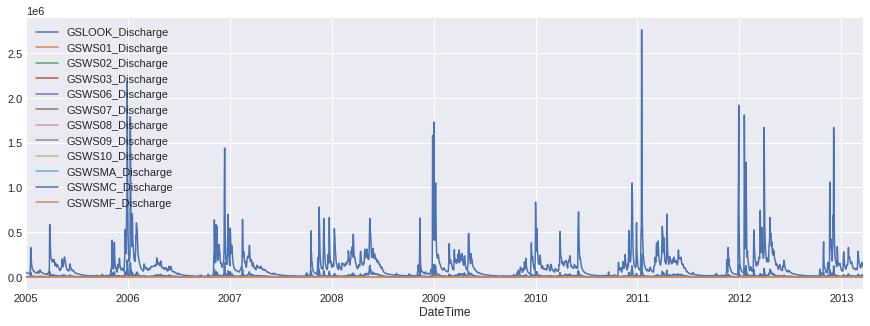

In [85]:
get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])
get_data(4,['AirTemperature']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])
get_data(4,['SolarRadiation']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])
get_data(4,['SWE']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])
get_data(4,['SoilMoisture']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])
get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000].plot(figsize = [15,5])

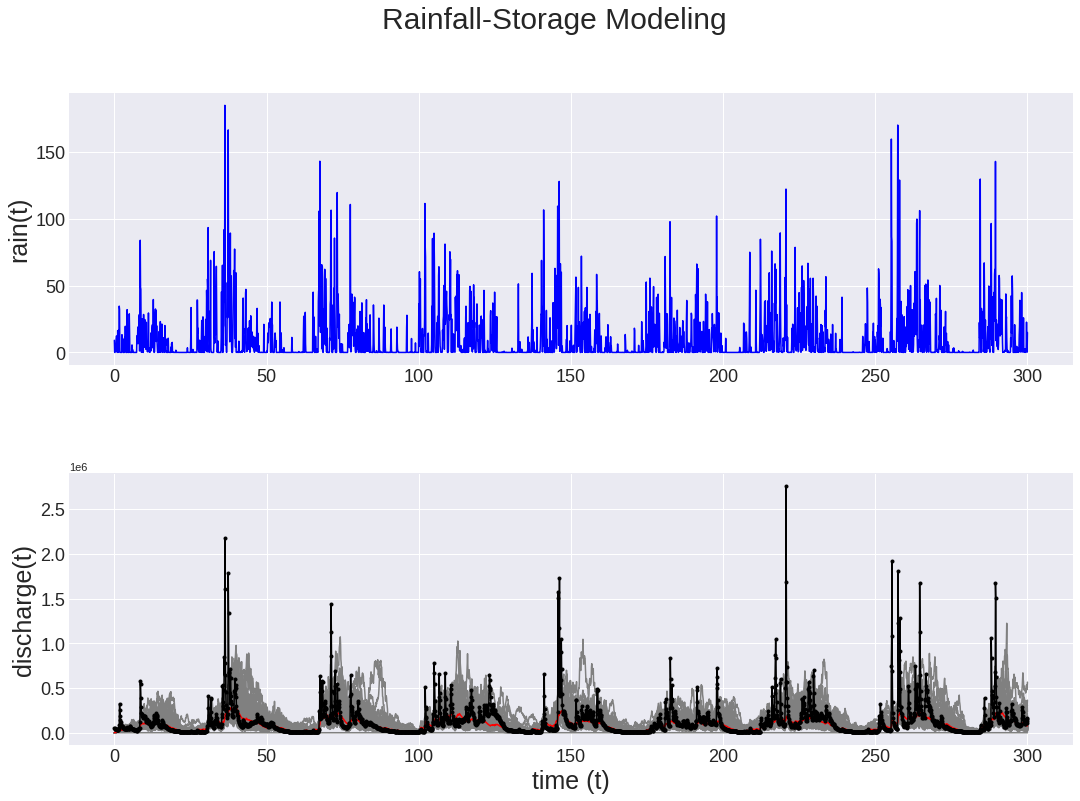

In [98]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(2,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,sim, color = 'gray')
ax[1].plot(t,sim.mean(axis=1), color = 'red')
ax[1].plot(t,discharge, color = 'black',marker = '.')

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,4])
ax[1].set_xlabel('time (t)', fontsize = 25)
ax[1].set_ylabel('discharge(t)', fontsize = 25)
#ax[1].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[1].tick_params(axis='both', which='major', labelsize=18)

#fig.savefig('SDE_test.jpg',dpi = 150)

In [159]:
#par = np.array(samplespar)[2000:3000,:]#[np.random.randint(2500,size =1000)]
#par = np.tile([np.asarray(samplespar)[:,0].mean(),np.asarray(samplespar)[:,1].mean(),np.asarray(samplespar)[:,2].mean()], (200,1))
par = np.tile([0.6, 0.1,4.1],(100,1))

rain = np.array(get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
discharge = np.asarray(get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['GSLOOK_Discharge'])

HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


In [167]:
dt = 0.1  # Time step.
T = 300.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.


n =3000
x = np.ones([n,100])
sim = np.zeros([n,100])
for j in range(99):    
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + rain[i]*dt -1/par[j,0]*(1+par[j,1]/2)*x[i,j]*dt + \
        np.sqrt(par[j,1]/par[j,0])*x[i,j]*np.random.normal(0,np.sqrt(dt),1)
    sim[:,j] = 1/par[j,0]*(1+par[j,1]/2)*x[:,j]*(10**par[j,2])

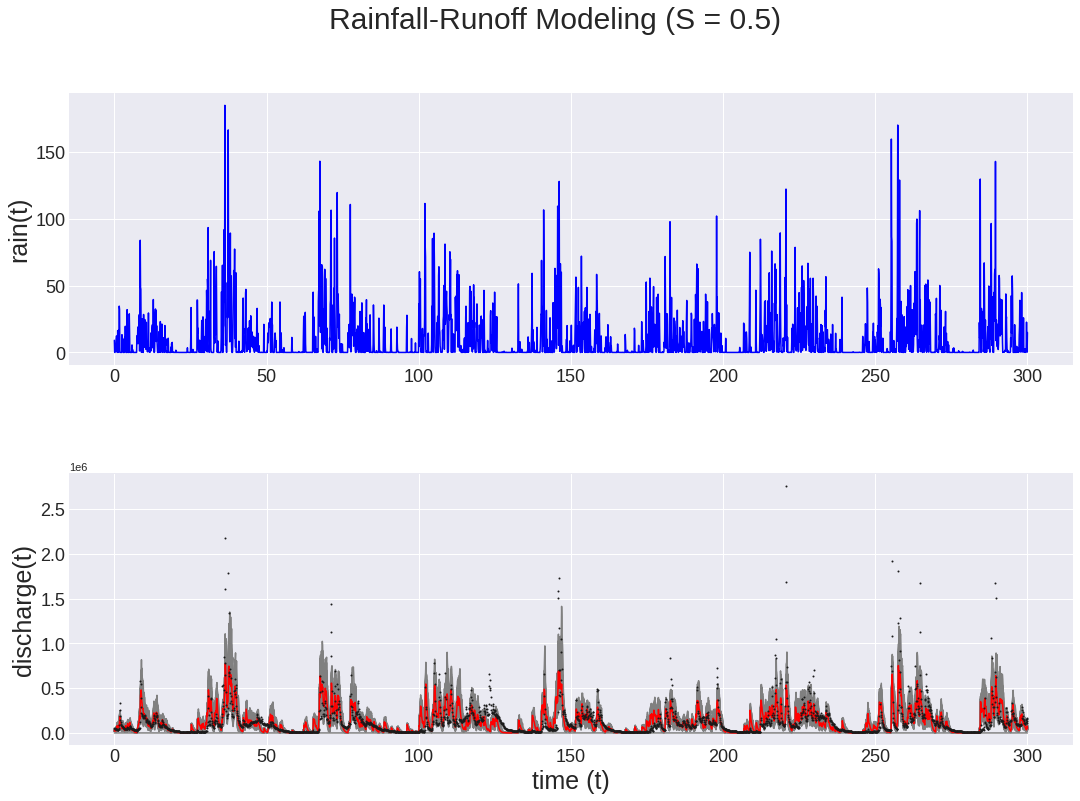

In [161]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(2,figsize=(18, 12))
fig.suptitle('Rainfall-Runoff Modeling (S = 0.5)', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,sim, color = 'gray')
ax[1].plot(t,sim.mean(axis=1), color = 'red')
ax[1].plot(t,discharge, 'k.', markersize = 2 )

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,4])
ax[1].set_xlabel('time (t)', fontsize = 25)
ax[1].set_ylabel('discharge(t)', fontsize = 25)
#ax[1].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[1].tick_params(axis='both', which='major', labelsize=18)

fig.savefig('SDE_HJ.jpg',dpi = 150)

In [79]:
1-np.sum((discharge - sim.mean(axis=1))**2)/np.sum((discharge - discharge.mean())**2)

0.501729344198447

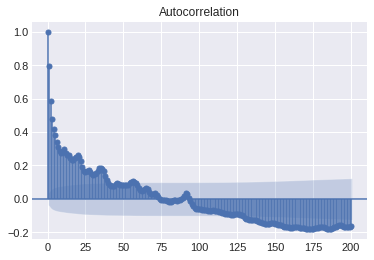

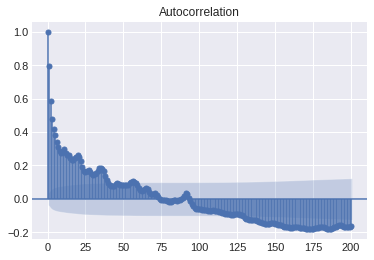

In [88]:
sm.graphics.tsa.plot_acf(discharge, lags=200)

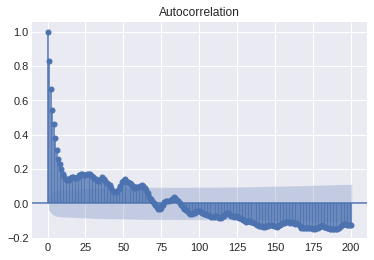

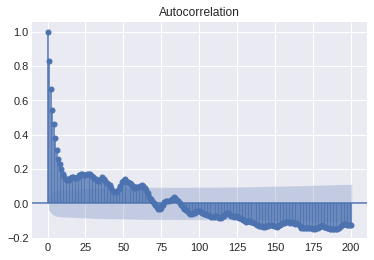

In [101]:
sm.graphics.tsa.plot_acf(sim[:,3], lags=200)

# Load CHOSEN data

EastRiver
EastRiver
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'SnowDepth', 'SoilMoisture']
EastRiver
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'SnowDepth', 'SoilMoisture']


<AxesSubplot:xlabel='DateTime'>

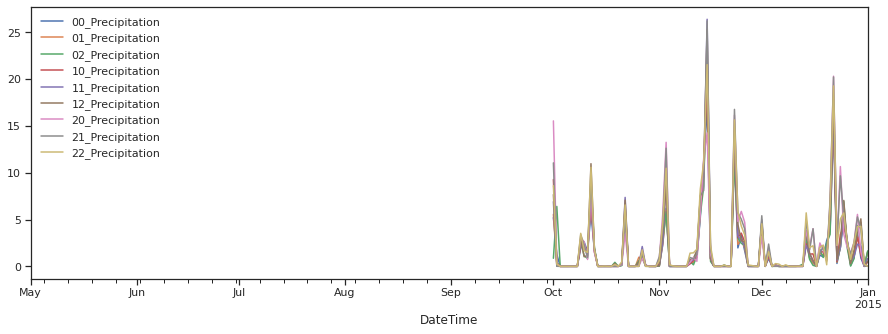

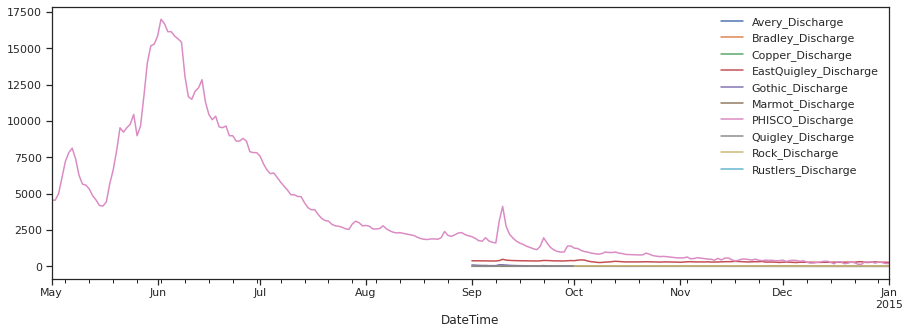

In [267]:
get_station_name(1)
get_data(1,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(1,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

DryCreek
DryCreek
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']
DryCreek
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']


<AxesSubplot:xlabel='DateTime'>

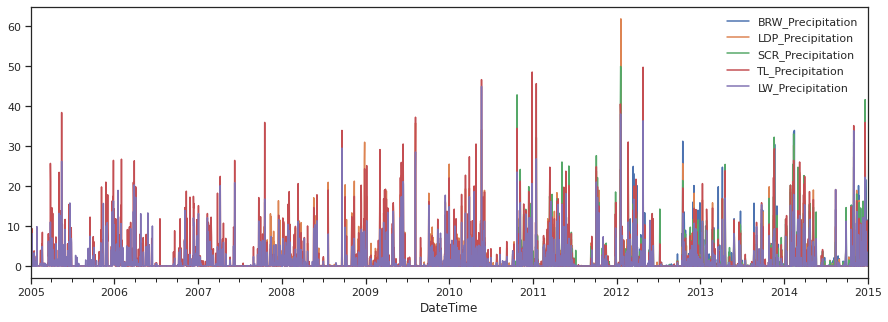

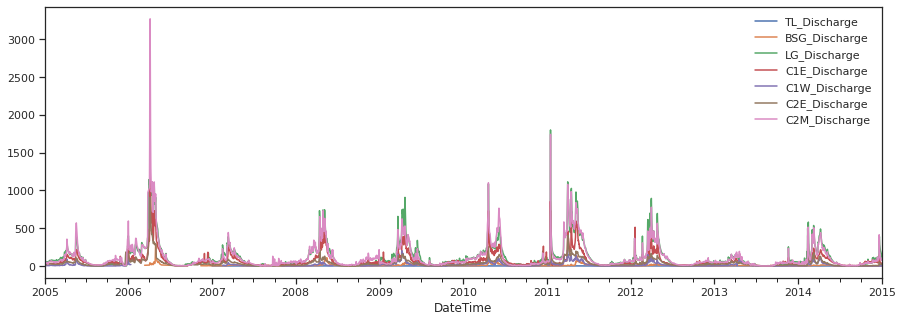

In [268]:
get_station_name(2)
get_data(2,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(2,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Sagehen
Sagehen
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'SolarRadiation', 'WindSpeed', 'SnowDepth']
Sagehen
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'SolarRadiation', 'WindSpeed', 'SnowDepth']


<AxesSubplot:xlabel='DateTime'>

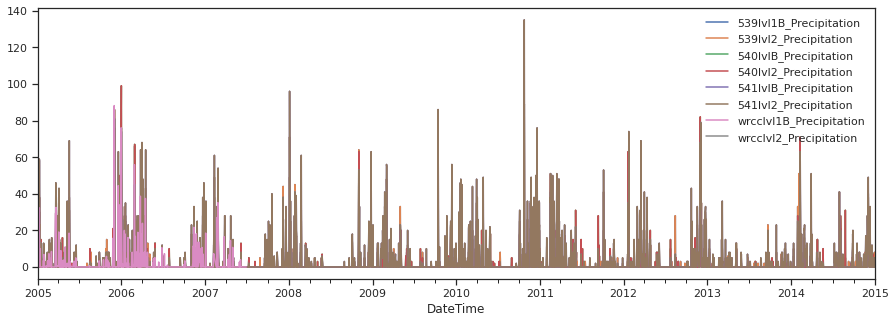

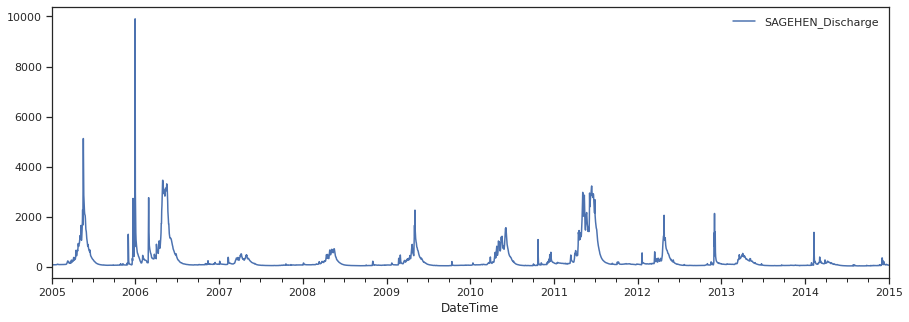

In [269]:
get_station_name(3)
get_data(3,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(3,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

HJAndrews
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


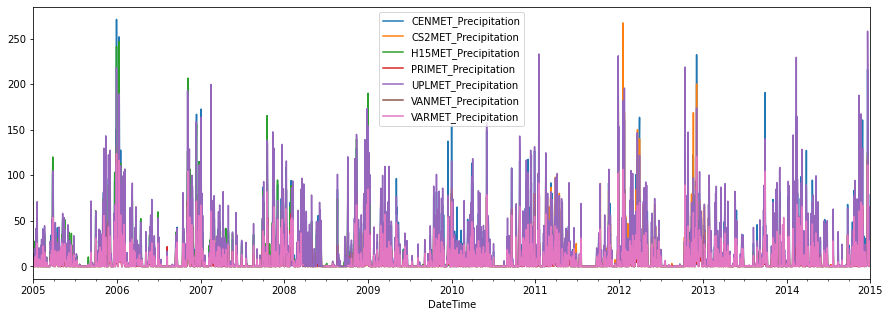

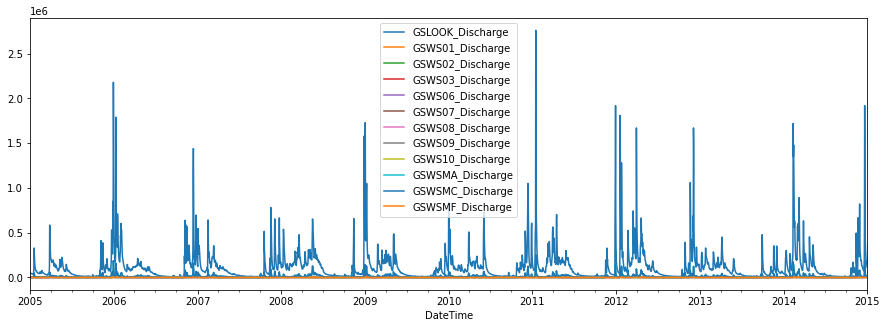

In [465]:
get_station_name(4)
get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Baltimore
Baltimore
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'SoilMoisture', 'SoilTemperature']
Baltimore
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'SoilMoisture', 'SoilTemperature']


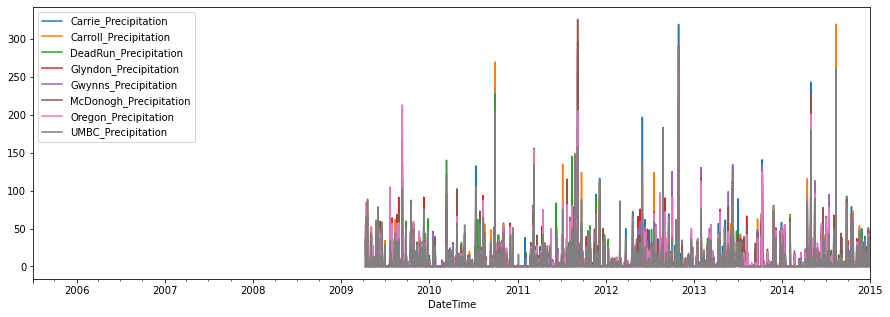

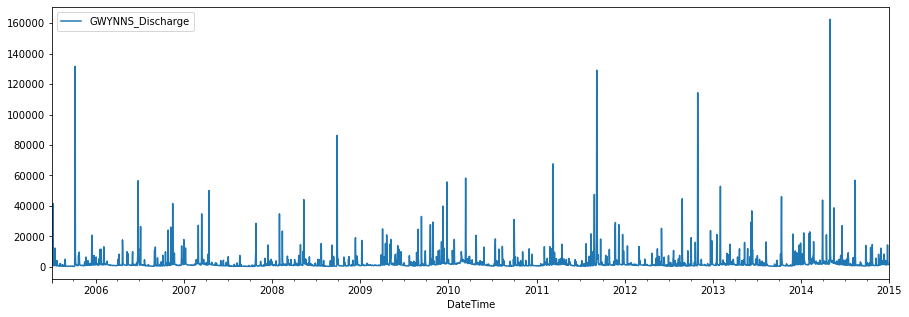

In [461]:
get_station_name(5)
get_data(5,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(5,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Bonanza
Bonanza
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'VaporPressure', 'SoilMoisture', 'SoilTemperature']
Bonanza
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'VaporPressure', 'SoilMoisture', 'SoilTemperature']


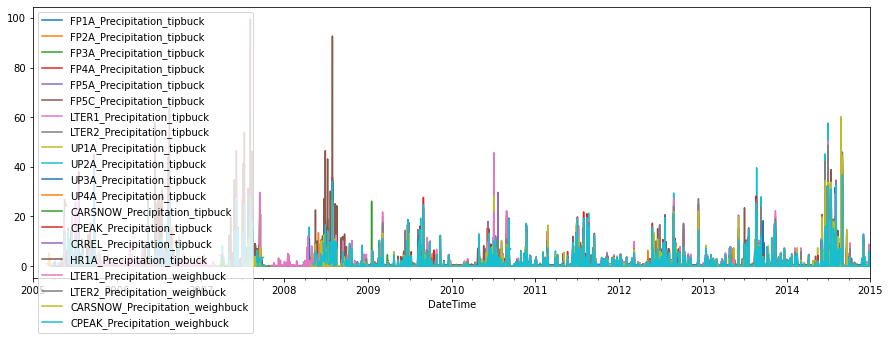

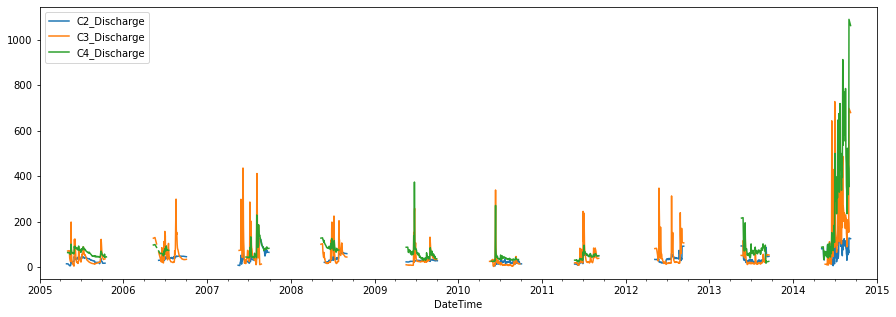

In [466]:
get_station_name(6)
get_data(6,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(6,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

CCE
CCE
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature']
CCE
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature']


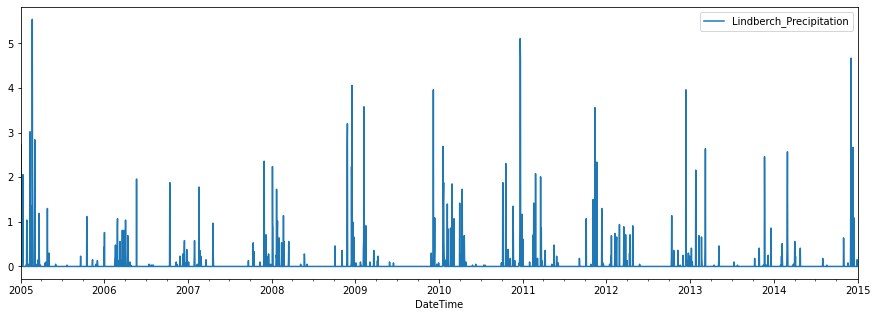

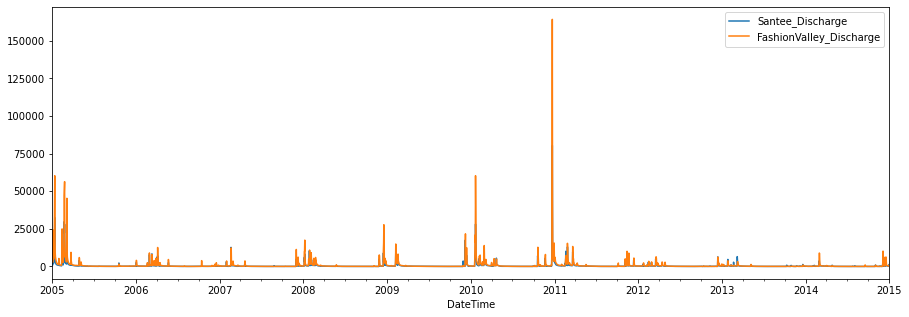

In [460]:
get_station_name(7)
get_data(7,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(7,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

CCE
CCE
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature']
CCE
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature']


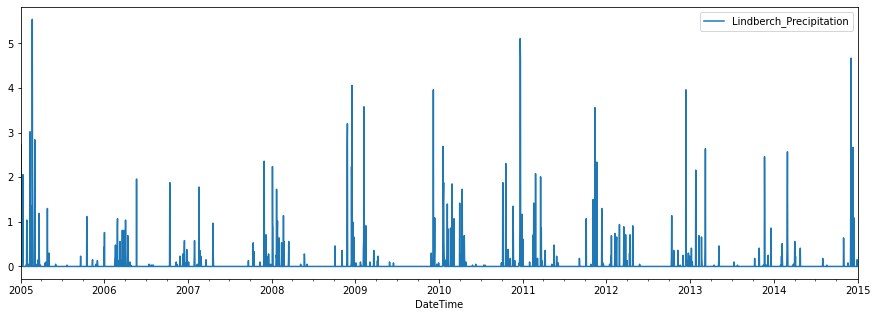

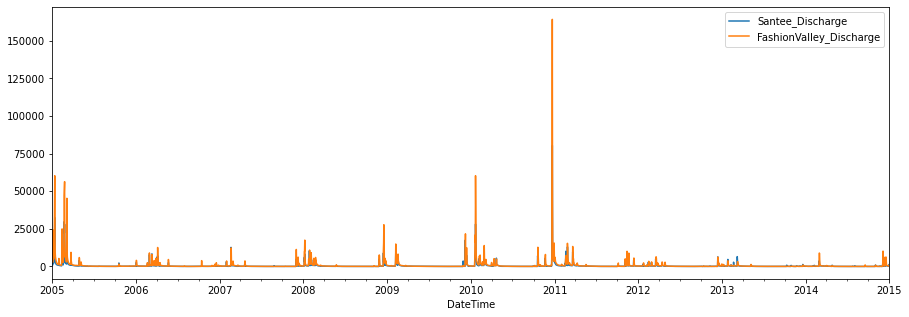

In [492]:
get_station_name(7)
get_data(7,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(7,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

CentralArizona
CentralArizona
Hydrometeorological variables in this watershed are:
['Discharge']
CentralArizona
Hydrometeorological variables in this watershed are:
['Discharge']


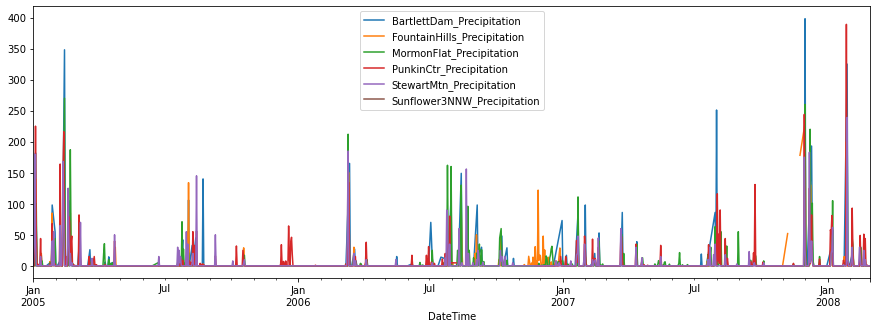

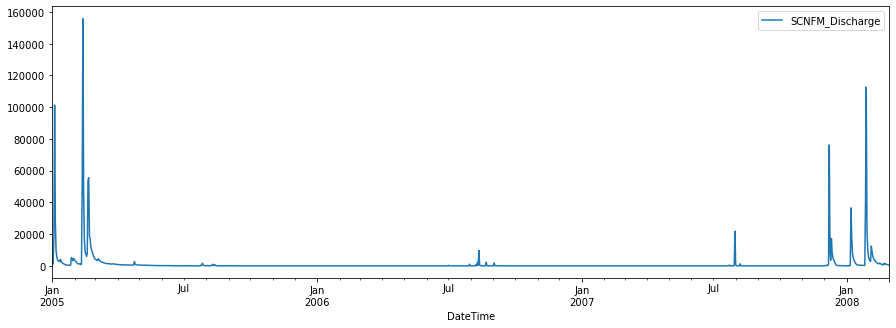

In [468]:
get_station_name(8)
get_data(8,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(8,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Coweeta
Coweeta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']
Coweeta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


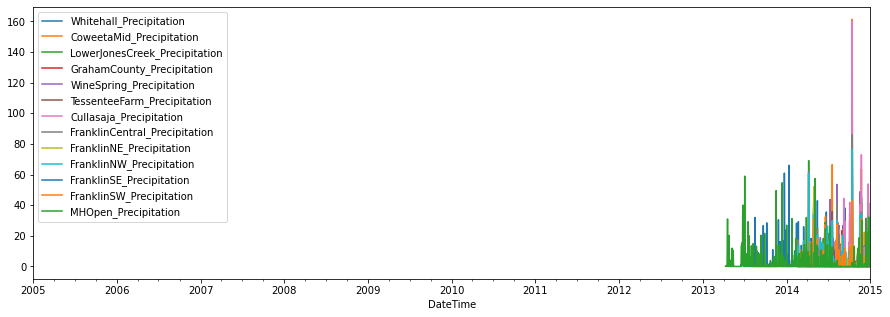

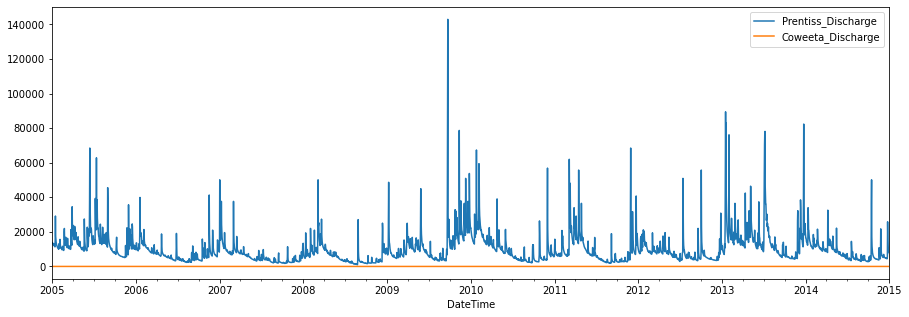

In [469]:
##########
get_station_name(9)
get_data(9,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(9,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Florida
Florida
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'WindDirection', 'WindSpeed']
Florida
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'WindDirection', 'WindSpeed']


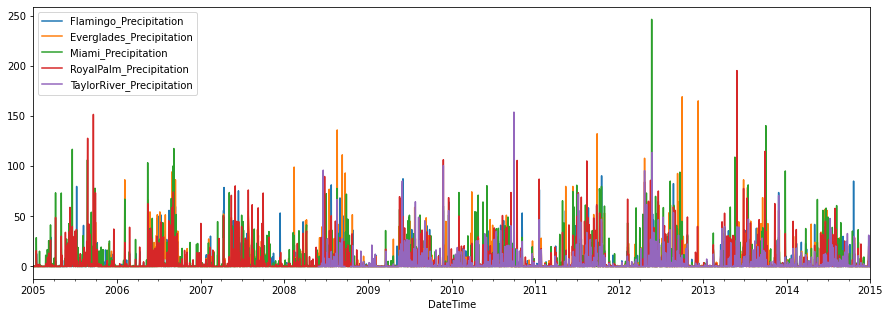

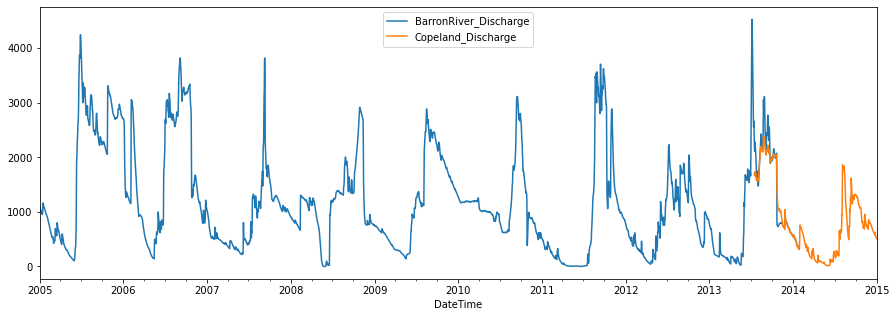

In [470]:
##########
get_station_name(10)
get_data(10,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(10,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Georgia
Georgia
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection']
Georgia
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection']


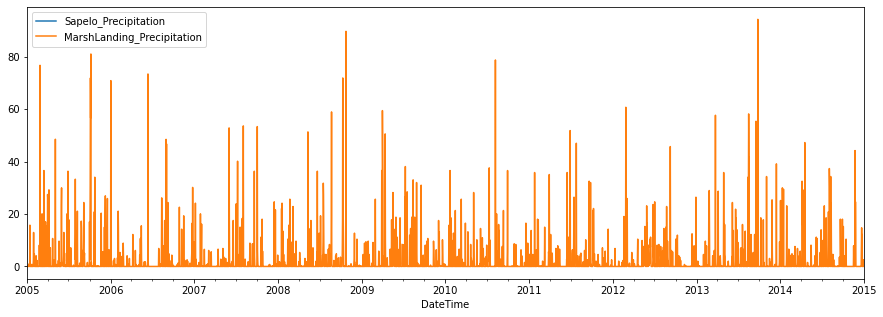

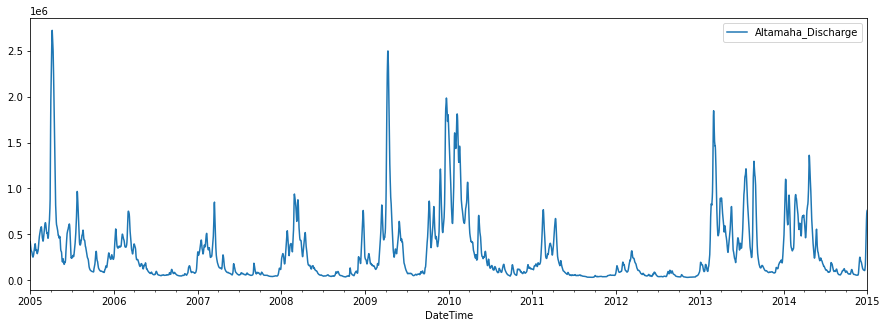

In [471]:
##########
get_station_name(11)
get_data(11,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(11,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Harvard
Harvard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'SoilMoisture']
Harvard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'SoilMoisture']


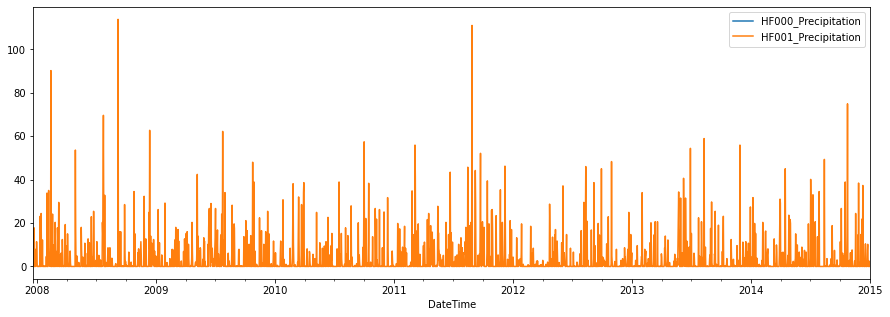

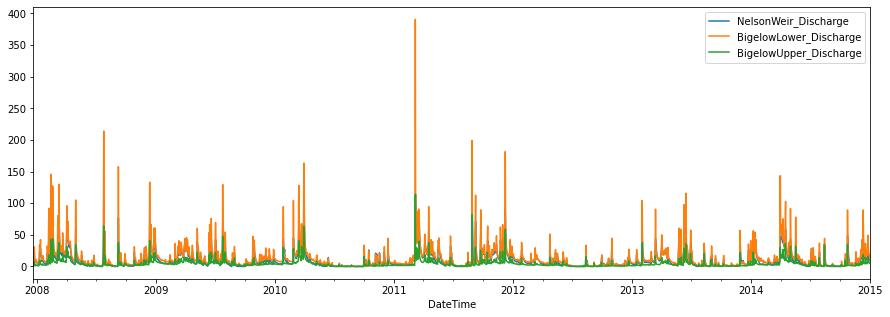

In [472]:
##########
get_station_name(12)
get_data(12,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(12,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Hubbard
Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']
Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']


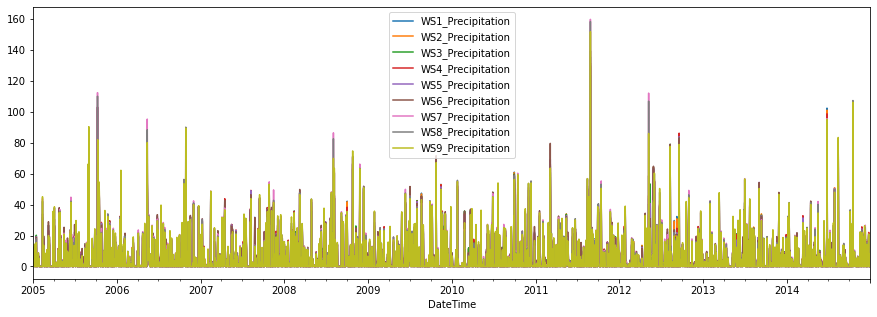

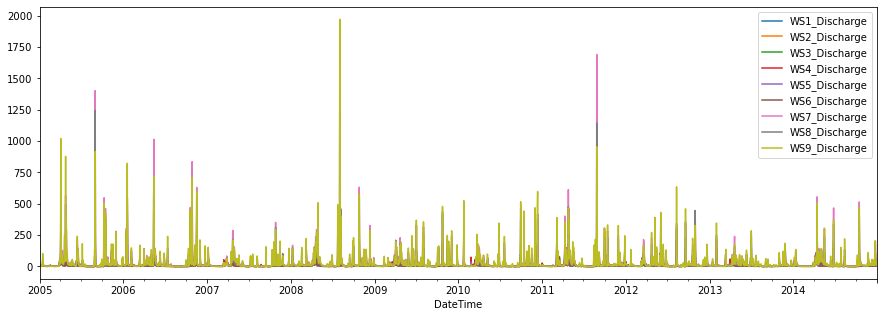

In [473]:
##########
get_station_name(13)
get_data(13,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(13,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Jornada
Jornada
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed']
Jornada
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed']


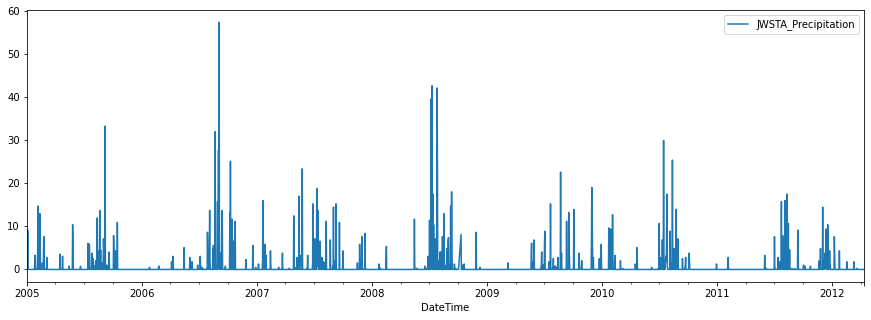

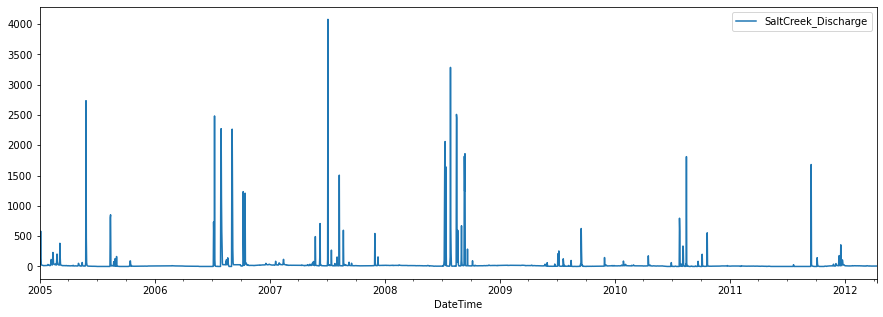

In [474]:
##########
get_station_name(14)
get_data(14,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(14,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Kellogg
Kellogg
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth']
Kellogg
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth']


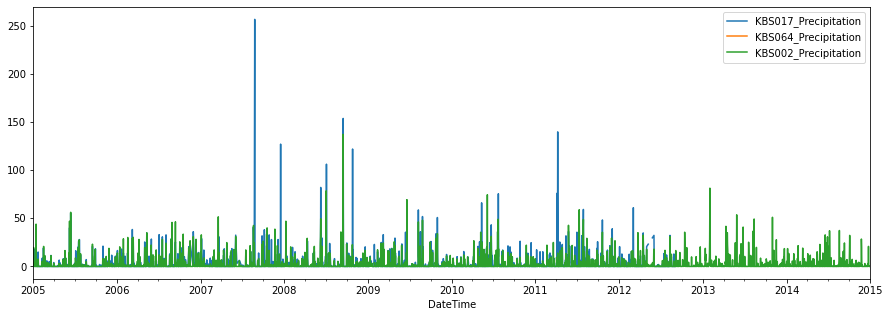

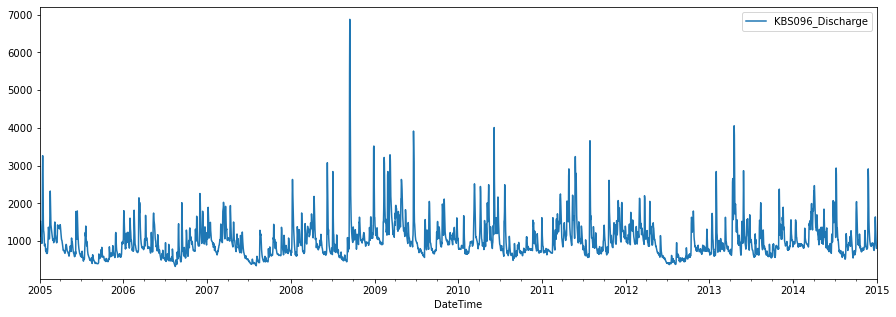

In [475]:
##########
get_station_name(15)
get_data(15,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(15,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

KonzaPrairie
KonzaPrairie
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed']
KonzaPrairie
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed']


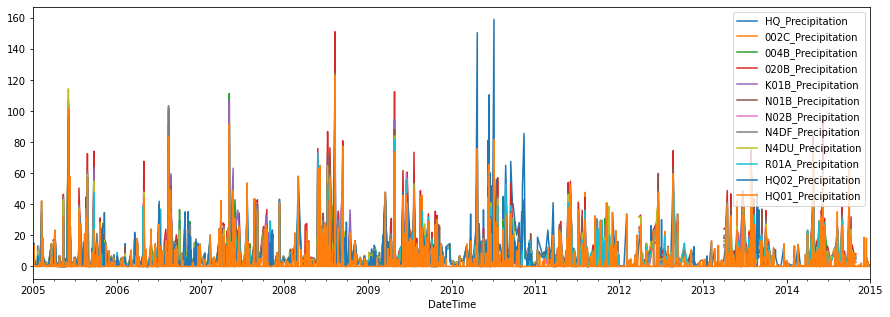

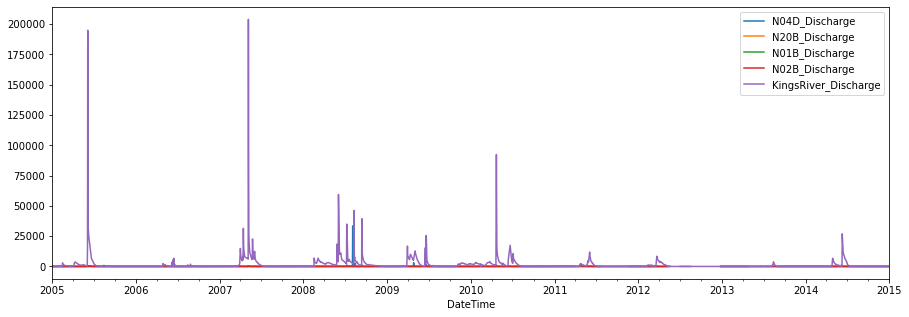

In [476]:
##########
get_station_name(16)
get_data(16,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(16,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

NGA
NGA
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']
NGA
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']


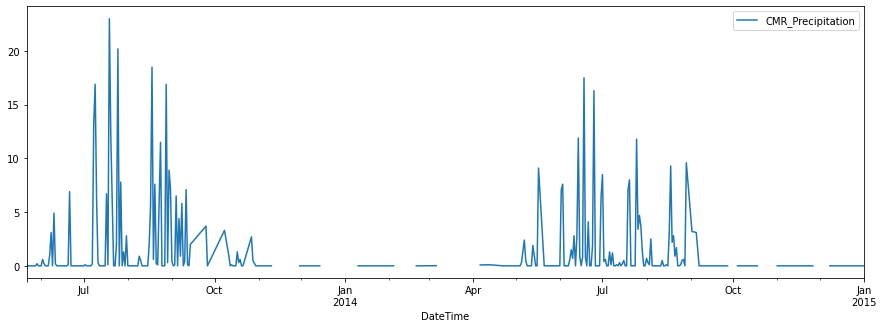

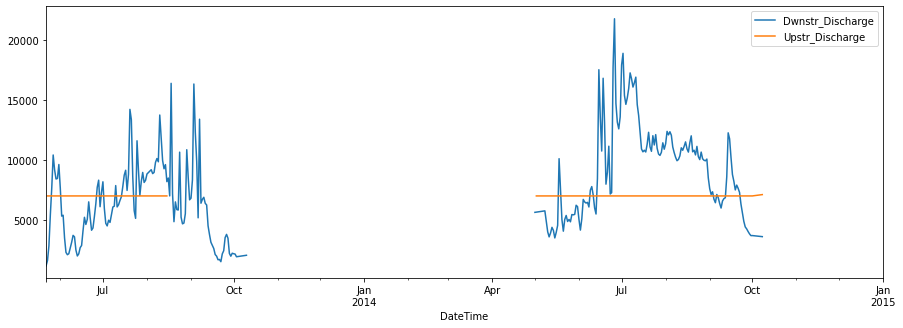

In [477]:
##########
get_station_name(17)
get_data(17,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(17,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

PlumIsland
PlumIsland
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity']
PlumIsland
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity']


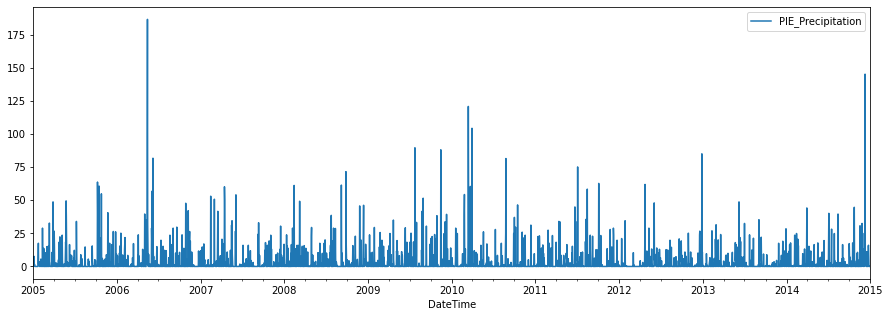

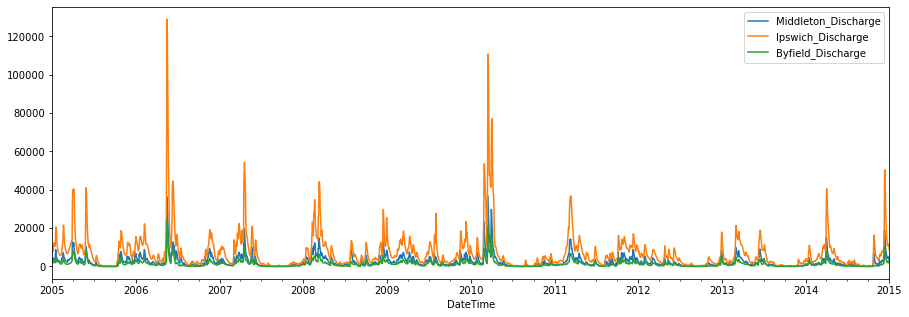

In [478]:
##########
get_station_name(18)
get_data(18,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(18,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Sevilleta
Sevilleta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']
Sevilleta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


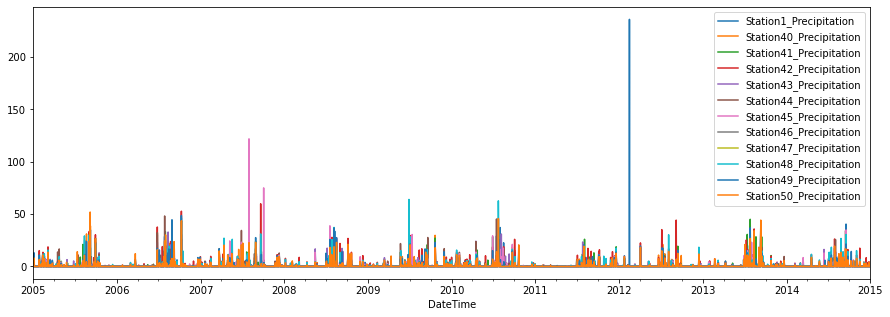

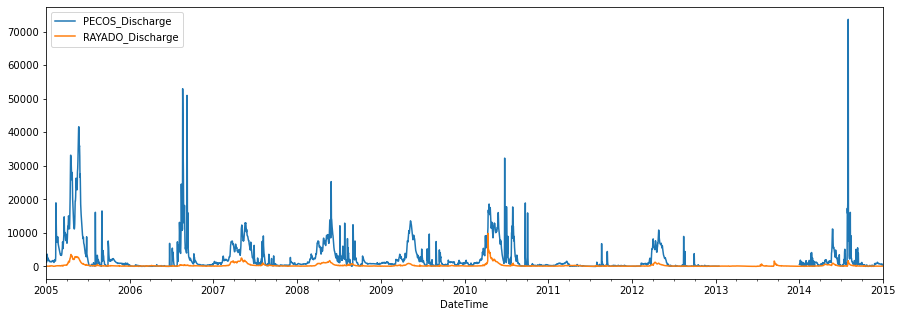

In [479]:
##########
get_station_name(19)
get_data(19,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(19,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Boulder
Boulder
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'SnowDepth', 'SoilMoisture']
Boulder
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'SnowDepth', 'SoilMoisture']


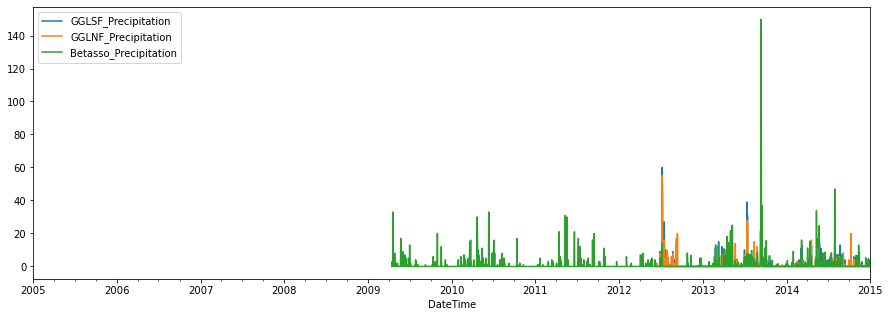

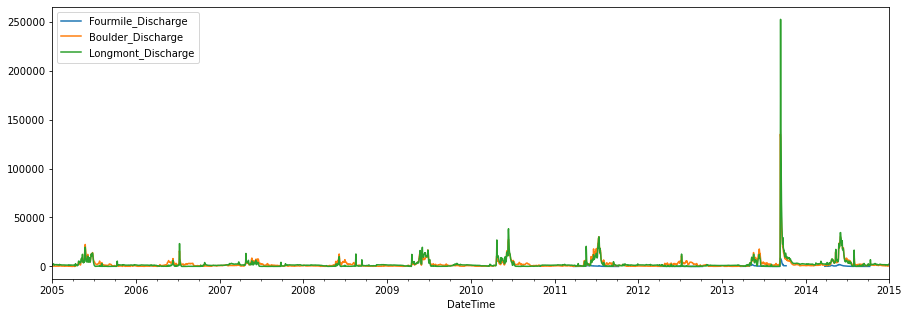

In [480]:
##########
get_station_name(20)
get_data(20,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(20,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Catalina
Catalina
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SnowDepth', 'SoilMoisture']
Catalina
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SnowDepth', 'SoilMoisture']


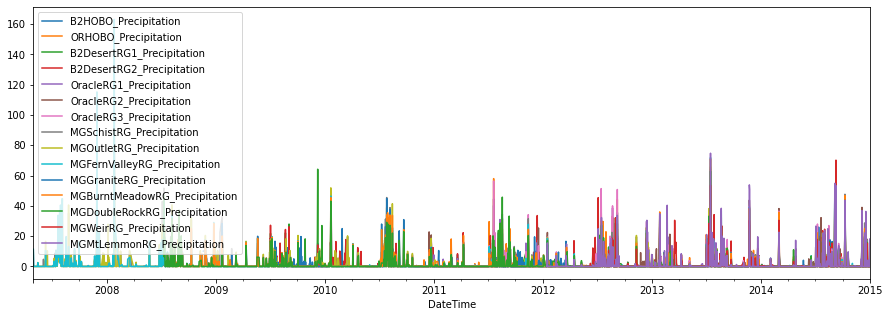

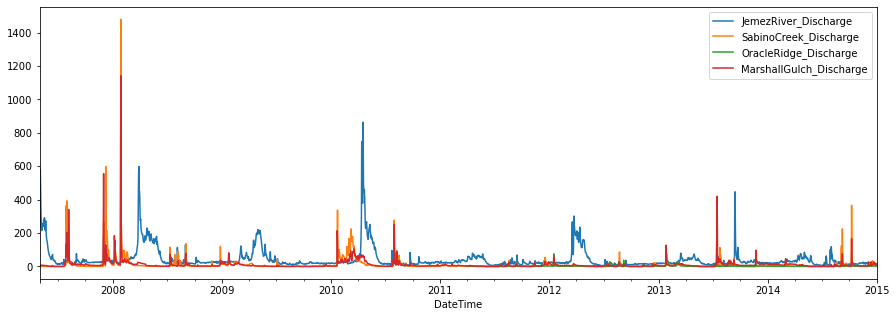

In [481]:
##########
get_station_name(21)
get_data(21,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(21,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Jemez
Jemez
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']
Jemez
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']


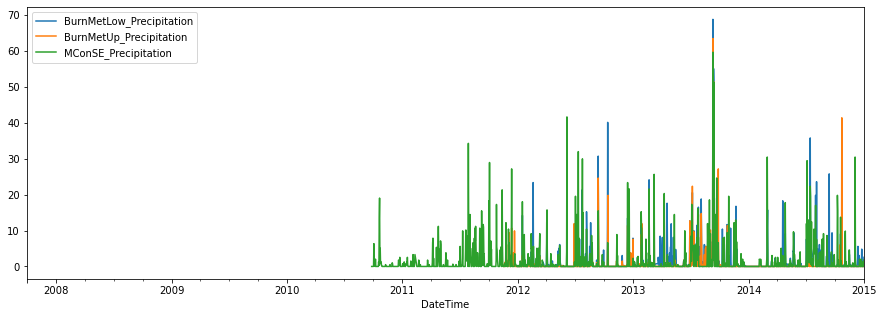

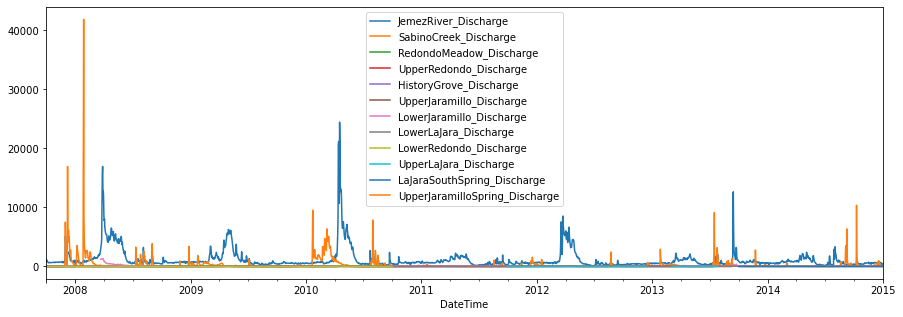

In [482]:
##########
get_station_name(22)
get_data(22,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(22,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

WhiteClay
WhiteClay
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SoilMoisture', 'SoilTemperature']
WhiteClay
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SoilMoisture', 'SoilTemperature']


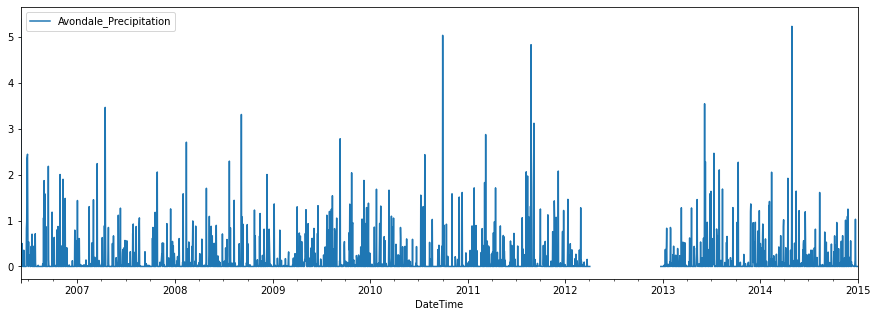

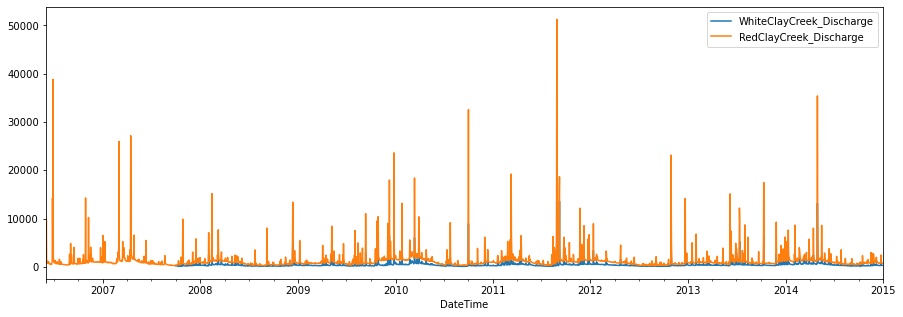

In [483]:
##########
get_station_name(23)
get_data(23,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(23,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Luquillo
Luquillo
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']
Luquillo
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


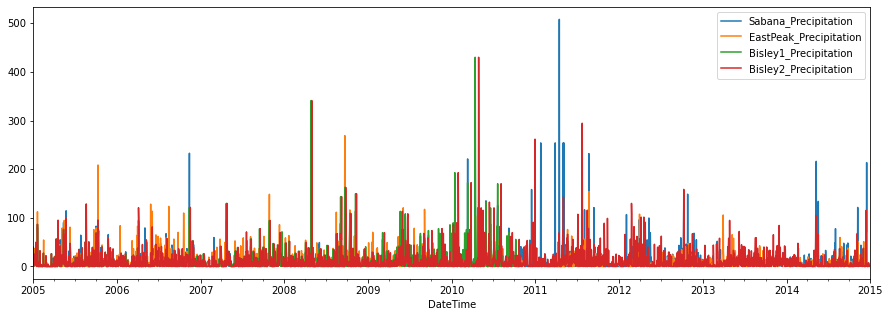

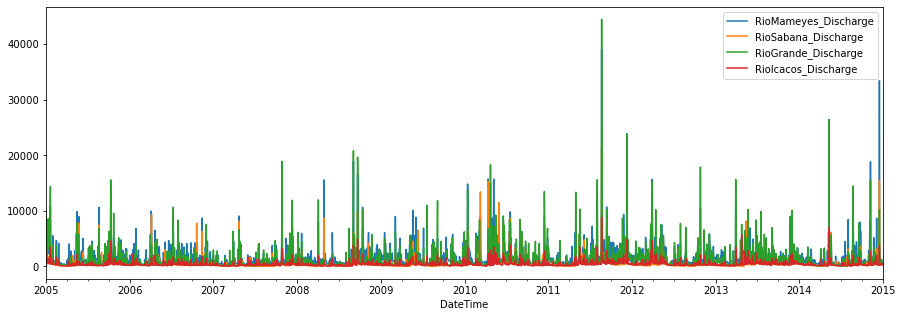

In [485]:
##########
get_station_name(24)
get_data(24,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(24,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Reynolds
Reynolds
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'VaporPressure', 'SoilMoisture']
Reynolds
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'VaporPressure', 'SoilMoisture']


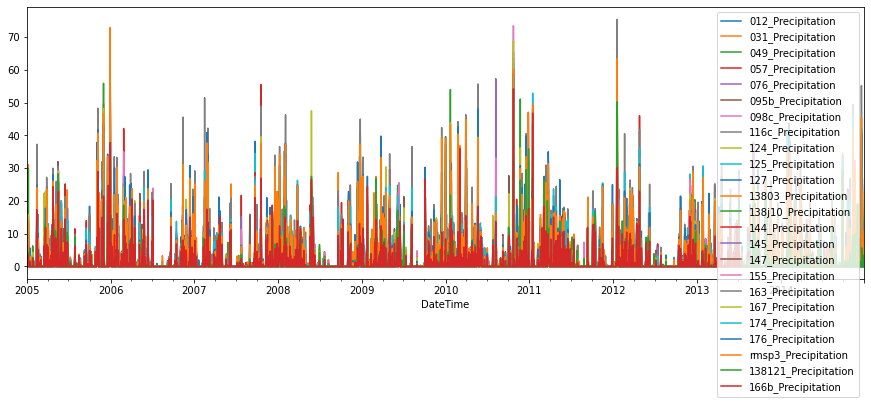

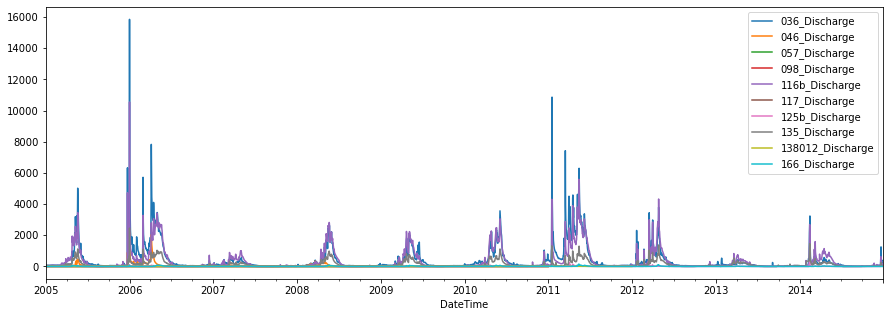

In [486]:
##########
get_station_name(25)
get_data(25,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(25,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

ShaleHill
ShaleHill
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SoilMoisture', 'SoilTemperature']
ShaleHill
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SoilMoisture', 'SoilTemperature']


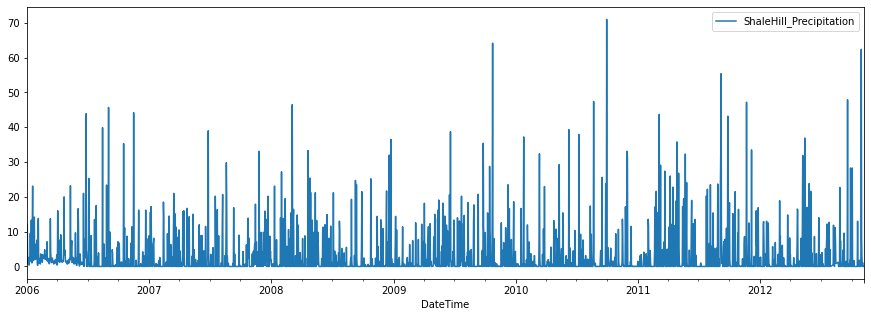

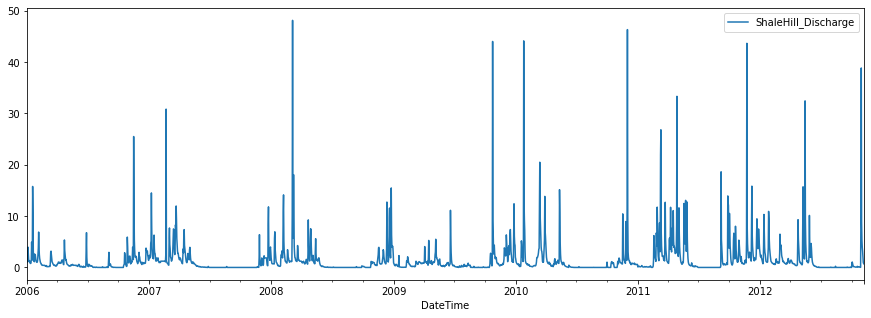

In [487]:
##########
get_station_name(26)
get_data(26,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(26,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

SanJoaquin
SanJoaquin
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SoilMoisture']
SanJoaquin
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SoilMoisture']


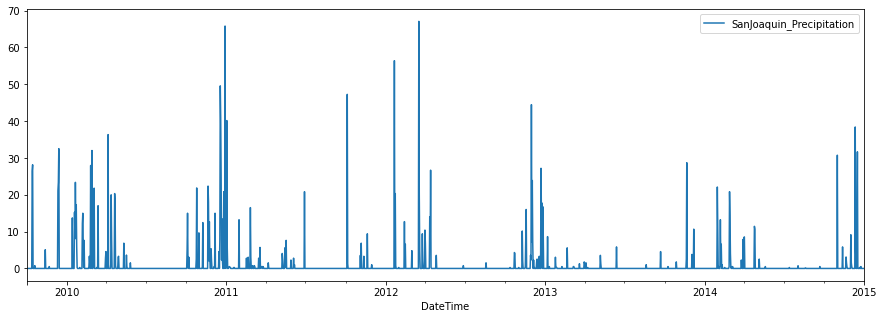

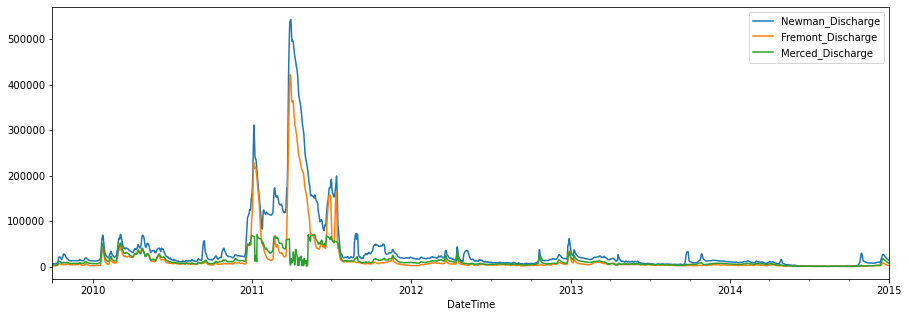

In [488]:
##########
get_station_name(27)
get_data(27,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(27,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Providence
Providence
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']
Providence
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']


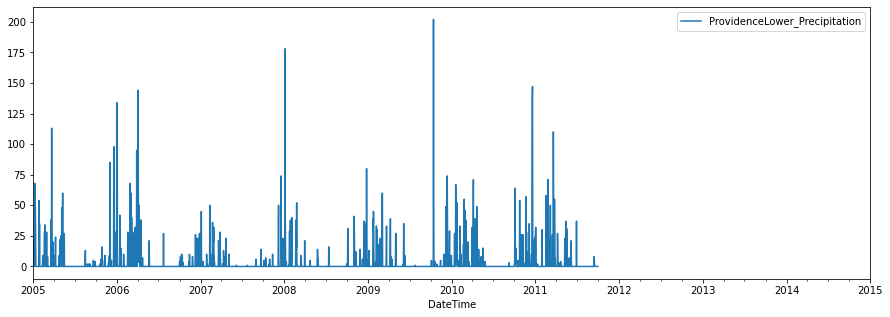

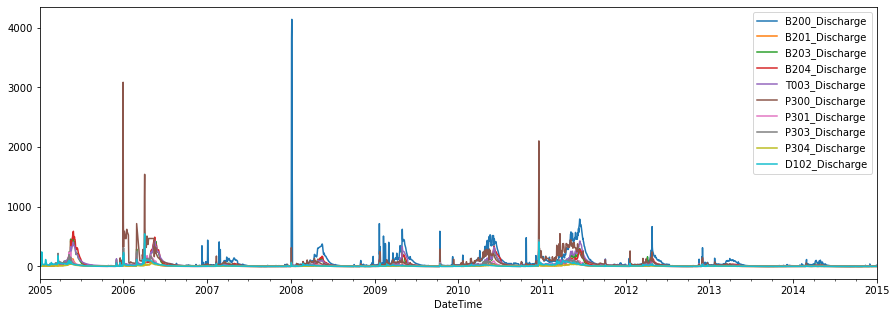

In [489]:
##########
get_station_name(28)
get_data(28,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(28,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Wolverton
Wolverton
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']
Wolverton
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']


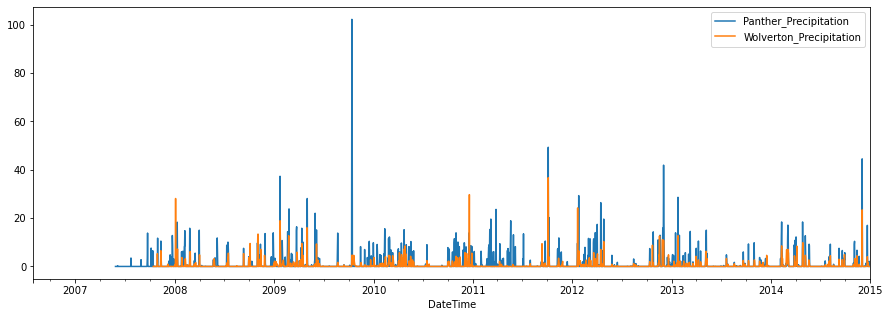

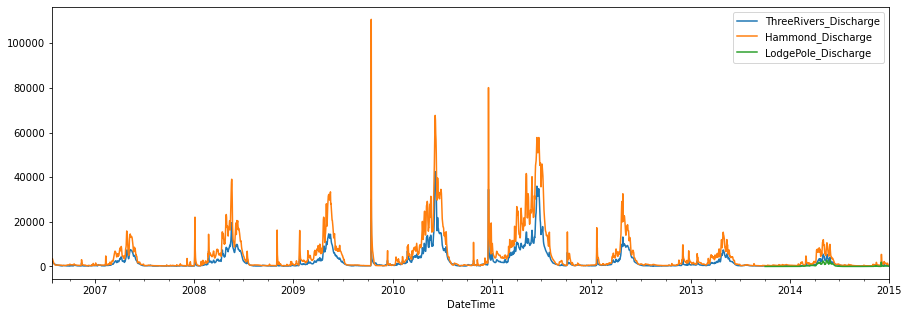

In [490]:
##########
get_station_name(29)
get_data(29,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(29,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Calhoun
Calhoun
Hydrometeorological variables in this watershed are:
['Discharge']
Calhoun
Hydrometeorological variables in this watershed are:
['Discharge']


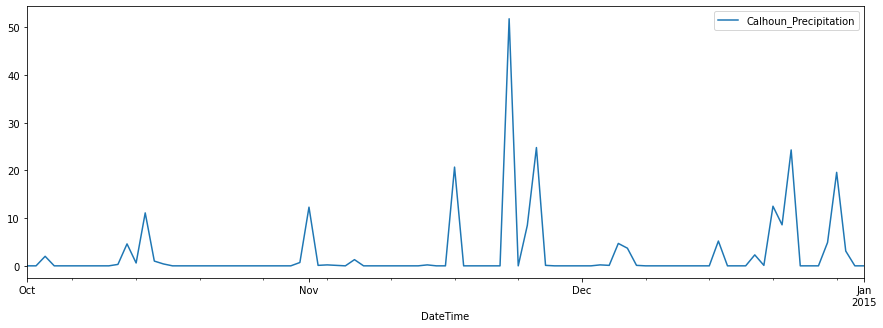

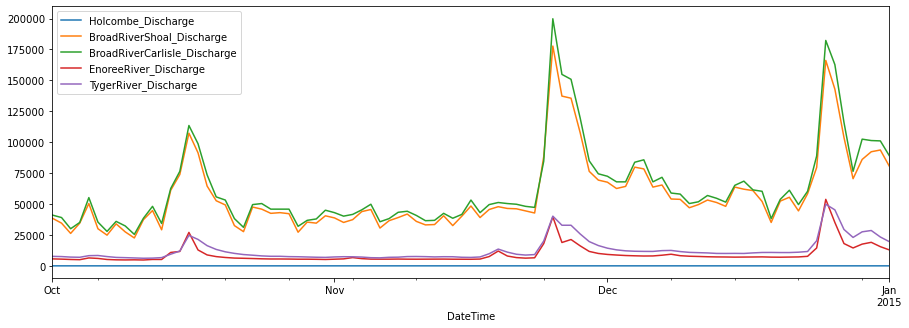

In [491]:
##########
get_station_name(30)
get_data(30,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(30,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])